# Time Series Project 

## ELUTIONS

### Objective

 1. __O__btain data and understand data structures and data elements.
 2. __S__crub data using scripting methods, to include debugging, for data manipulation in R and other tools. 
 3. __E__xplore data using essential qualitative analysis techniques including descriptive statistics. 
 4. __M__odel relationships between data using the appropriate analytical methodologies matched to the information and the needs of clients and users. 
 5. __IN__terpret the data, model, analysis, and findings.  Communicate the results in a meaningful way. 

### Instructions

1.	Clean and pre-process the data
2.	Summarize the data 
3.	Find anomalies in the target variables (Y1 , Y2). Explain your method and your findings
4.	Forecast the Y variables for next 14 days (2017-07-02 to 2017-07-15). You should focus on improving accuracy of your predictions 
5.	Create a detailed report with plots and explanation of the analysis you’ve done
6.	Submit both the report and the code

__Note: You are free to choose any combination of variables, or even do PCA from the given data set. You are free to resample the data. You are free to use any machine learning models or statistical models or toolboxes. Please note that you must explain your methods and your decisions in the report. You can use either python or R.__


### Dataset


Sample time series data set which has a total of 10 features. There is one and a half year of data (2016-01-01 to 2017-07-01) sampled at 5 minutes. The Y features are the target variables and the X features are the independent variables. 

### Data Analysis

In [377]:
## Load the packages
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats
import pylab

from pandas import Series
from statistics import mean
from statistics import median

import itertools
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 300)

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pandas.plotting import register_matplotlib_converters
import seaborn as sns
import plotly.graph_objects as go

import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification

from fbprophet import Prophet
from matplotlib import pyplot

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults


#!pip install pmdarima
import pmdarima as pm
from pmdarima.arima import auto_arima

pd.plotting.register_matplotlib_converters() 

from IPython.display import display
from dateutil.parser import parse 

In [2]:
df = pd.read_csv('dataset_for_technical_assessment.csv', parse_dates=['Description'])

In [3]:
## Explore the data 
df.head(5)

,Description,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
0,2016-01-01 00:00:00,0.008133,0.805288,0.934119,0.182838,0.282637,0.612302,0.218844,0.036615,0.695623,0.286383
1,2016-01-01 00:05:00,0.008964,0.799772,0.934014,0.180689,0.281720,0.611908,0.220869,0.037616,0.693026,0.296014
2,2016-01-01 00:10:00,0.008906,0.809219,0.934031,0.181439,0.282202,0.610927,0.222187,0.034264,0.692654,0.289457
3,2016-01-01 00:15:00,0.008469,0.804602,0.934367,0.182620,0.282305,0.612801,0.221935,0.034894,0.693397,0.290959
4,2016-01-01 00:20:00,0.006882,0.799026,0.934884,0.180871,0.281051,0.610566,0.218883,0.038596,0.690928,0.287653


In [4]:
#df.tail(5)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
## How many rows the dataset
df['y1'].count() # 157738

157738

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157812 entries, 0 to 157811
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  157812 non-null  datetime64[ns]
 1   y1           157738 non-null  float64       
 2   y2           157738 non-null  float64       
 3   x1           157738 non-null  float64       
 4   x2           157812 non-null  float64       
 5   x3           157812 non-null  float64       
 6   x4           157742 non-null  float64       
 7   x5           157738 non-null  float64       
 8   x6           157738 non-null  float64       
 9   x7           157812 non-null  float64       
 10  x8           157812 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 13.2 MB


In [7]:
df.describe()

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
count,157738.000000,157738.000000,157738.000000,157812.000000,157812.000000,157742.000000,157738.000000,157738.000000,157812.000000,157812.000000
mean,0.263552,0.491896,0.926582,0.394719,0.429195,0.622602,0.249033,0.044933,0.662128,0.246650
std,0.333471,0.383769,0.079150,0.192880,0.189484,0.077190,0.041898,0.093490,0.069175,0.086718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000272,0.000000,0.000000,0.100328,0.049736
25%,0.008133,0.004324,0.930403,0.213694,0.250272,0.609024,0.228160,0.028401,0.645604,0.226272
50%,0.008906,0.775742,0.935801,0.402495,0.461837,0.626677,0.251683,0.035822,0.676395,0.251986
75%,0.677687,0.791200,0.938375,0.549447,0.585672,0.640240,0.266417,0.042721,0.690231,0.272234
max,1.000000,1.000000,1.000000,0.957686,0.974826,0.982159,0.406178,1.000000,0.914145,1.000000


In [8]:
#df.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));
df = df.drop_duplicates()

There are two target variables in the dataset (y1 and y1). 

Description column contains the date and the time. Time is mesured at 5 minutes.

There are way to many data points, we may need to resample the data.

If we want to do time series manipulation, we’ll need to have a date time index so that our data frame is indexed on the timestamp.

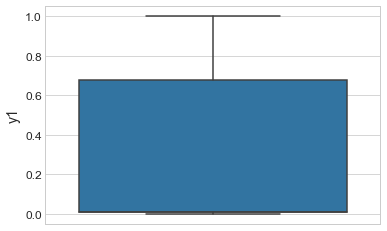

In [9]:
## Check the distribution of the target variable
sns.boxplot(y="y1", data = df)

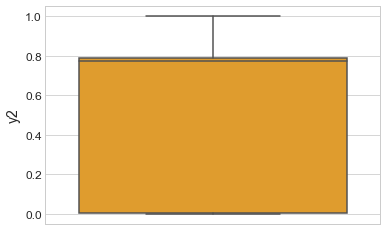

In [10]:
## Check the distribution of the target variable
sns.boxplot(y="y2", data = df, color = "#fca311" )

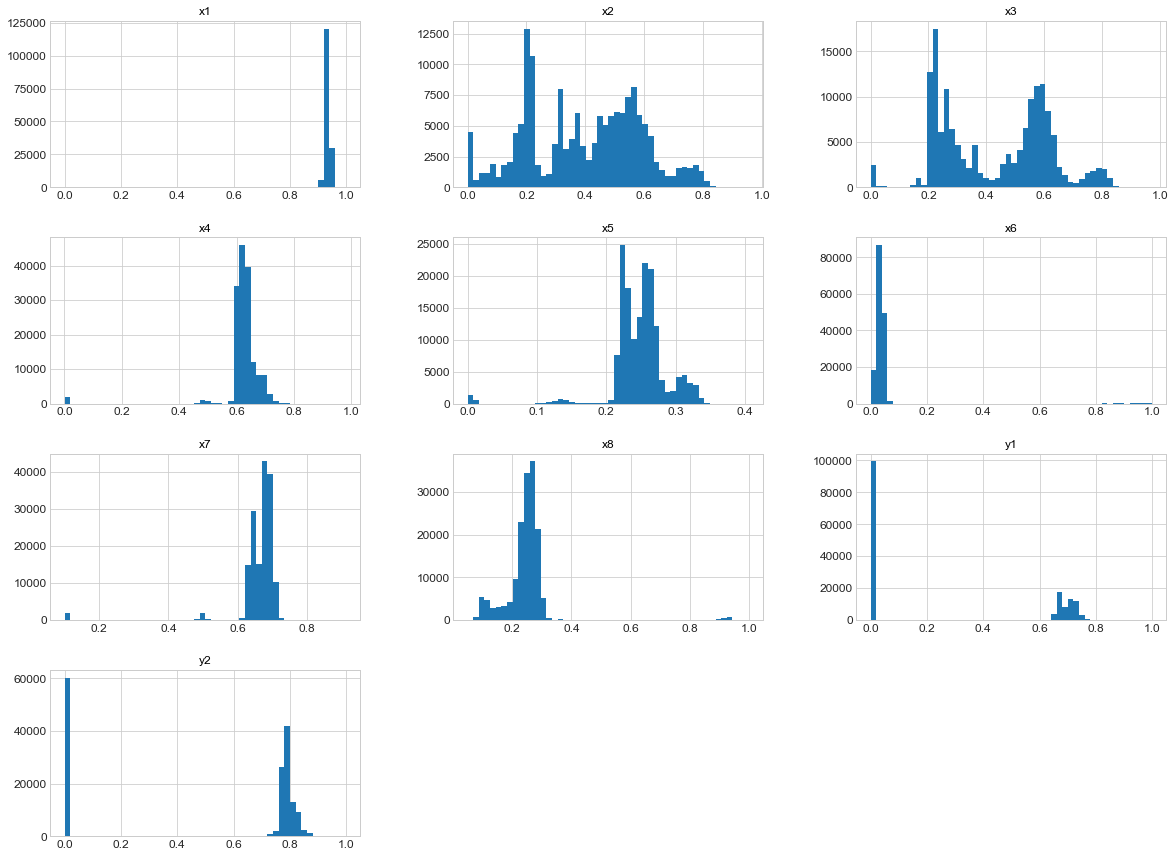

In [11]:
# Check all distributions
df.hist(bins = 50, figsize=(20,15))
plt.show()

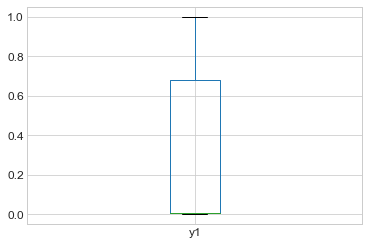

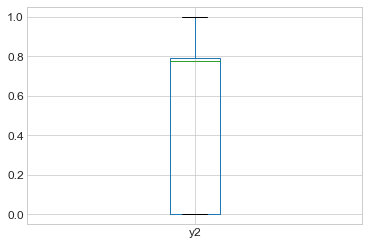

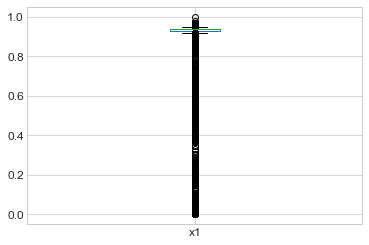

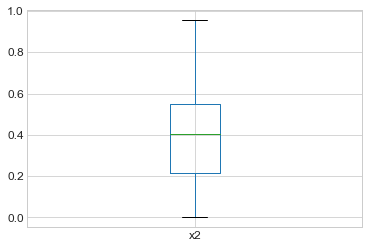

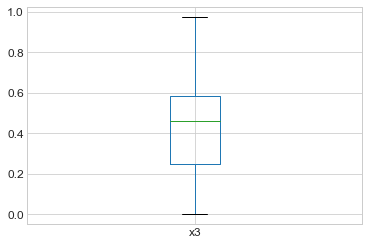

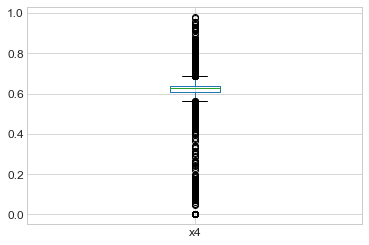

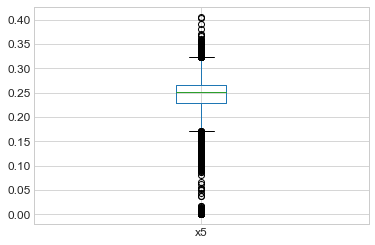

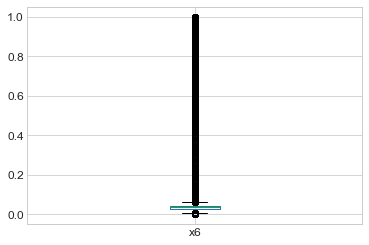

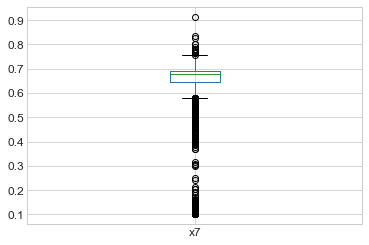

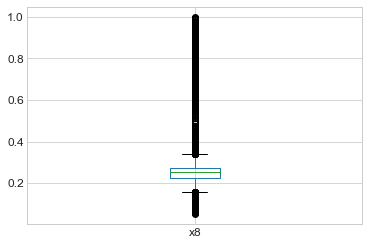

In [12]:
df2 = df.reset_index()
df2 = df.drop(['Description'], axis=1)
for i in df2.columns:
    df.boxplot(column=i)
    plt.show()

There are some outliers i in the predicors. Most of the data for y1 and y1 is centered around  0.

In [13]:
## Look at some relationships
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
y1,1.000000,-0.972258,0.076071,0.505402,0.559377,0.140224,0.248802,-0.022588,0.125400,-0.041839
y2,-0.972258,1.000000,0.140206,-0.442437,-0.489399,0.062806,-0.103235,-0.190188,0.074051,-0.131889
x1,0.076071,0.140206,1.000000,0.211467,0.238567,0.863072,0.624655,-0.971692,0.850176,-0.817828
x2,0.505402,-0.442437,0.211467,1.000000,0.936582,0.496296,0.702079,-0.168842,0.471297,-0.330768
x3,0.559377,-0.489399,0.238567,0.936582,1.000000,0.537155,0.753411,-0.208044,0.479528,-0.394540
x4,0.140224,0.062806,0.863072,0.496296,0.537155,1.000000,0.907226,-0.881002,0.924562,-0.900492
x5,0.248802,-0.103235,0.624655,0.702079,0.753411,0.907226,1.000000,-0.638883,0.801946,-0.810708
x6,-0.022588,-0.190188,-0.971692,-0.168842,-0.208044,-0.881002,-0.638883,1.000000,-0.857096,0.846507
x7,0.125400,0.074051,0.850176,0.471297,0.479528,0.924562,0.801946,-0.857096,1.000000,-0.729463
x8,-0.041839,-0.131889,-0.817828,-0.330768,-0.394540,-0.900492,-0.810708,0.846507,-0.729463,1.000000


#### __1. Clean and preprocess the data__

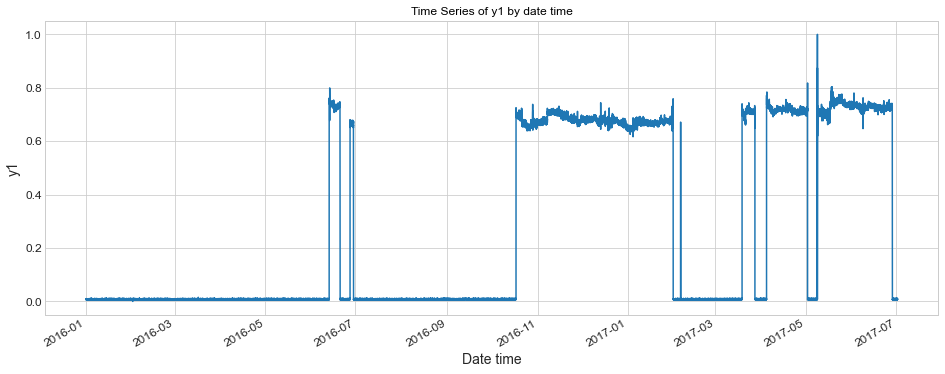

In [14]:
## Look at the y1
df.set_index('Description')['y1'].plot(figsize = (16,6))
plt.xlabel('Date time')
plt.ylabel('y1')
plt.title('Time Series of y1 by date time');

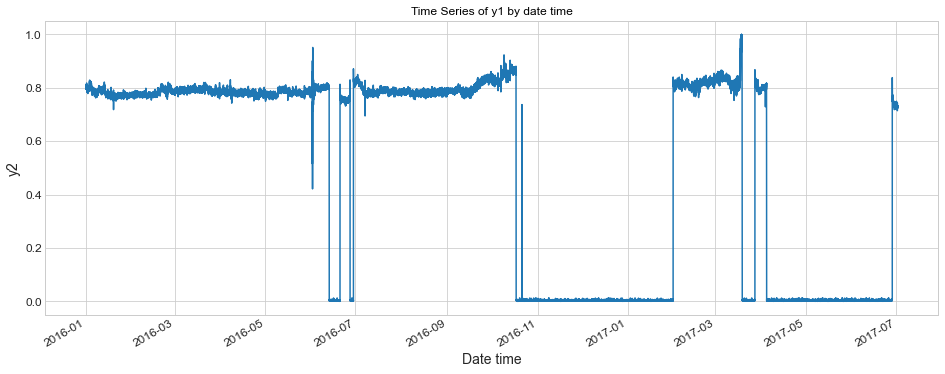

In [15]:
## Look at y2
df.set_index('Description')['y2'].plot(figsize = (16,6))
plt.xlabel('Date time')
plt.ylabel('y2')
plt.title('Time Series of y1 by date time');

In [16]:
## Split into Date and Time
#df['Dates'] = pd.to_datetime(df['Description']).dt.date

#df['Time'] = pd.to_datetime(df['Description']).dt.time

## Organiza\e the columns
#df1 = df[['Time', 'Dates', 'y1', 'y2', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
# df - has time and date combined
#df1

In [17]:
## Find NA`s 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df1 = df.copy()
na_values = df1.isna().sum()

print(na_values)

Description     0
y1             74
y2             74
x1             74
x2              0
x3              0
x4             70
x5             74
x6             74
x7              0
x8              0
dtype: int64


In [18]:
## Function that calculates the percentage of missing values
def calc_percent_NAs(df1):
    nans = pd.DataFrame(df1.isnull().sum().sort_values(ascending=False)/len(df), columns=['percent']) 
    idx = nans['percent'] > 0
    return nans[idx]
# Let's use above function to look at top ten columns with NaNs
calc_percent_NAs(df1).head(10)

,percent
x6,0.000469
x5,0.000469
x1,0.000469
y2,0.000469
y1,0.000469
x4,0.000444


There are several way to remove missing values in time series. Some of them are:

- Interpolate(uses various interpolation technique to fill the missing values)
- Forward-fill 
- Back-fill


In [19]:
## Use interpolate to handle missing values
#df1['y1'].interpolate(method='linear', inplace=True)
#df1['y2'].interpolate(method='linear', inplace=True)
#df1['x1'].interpolate(method='linear', inplace=True)
#df1['x4'].interpolate(method='linear', inplace=True)
#df1['x5'].interpolate(method='linear', inplace=True)
#df1['x6'].interpolate(method='linear', inplace=True)

In [20]:
## Fill the missing values with previous one
df1 = df1.fillna(method = "pad")
df1.isnull().sum()

Description    0
y1             0
y2             0
x1             0
x2             0
x3             0
x4             0
x5             0
x6             0
x7             0
x8             0
dtype: int64

In [21]:
## Check for missing values again
df1.isnull().values.any()

False

In [22]:
## Convert the data frame index to a date time index 
df1['datetime'] = pd.to_datetime(df1['Description'], format='%Y-%m-%d %h:%m%s', errors='coerce')
df1 = df1.set_index('datetime')
df1.drop(['Description'], axis=1, inplace=True)
df1.head()

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
datetime,,,,,,,,,,
2016-01-01 00:00:00,0.008133,0.805288,0.934119,0.182838,0.282637,0.612302,0.218844,0.036615,0.695623,0.286383
2016-01-01 00:05:00,0.008964,0.799772,0.934014,0.180689,0.281720,0.611908,0.220869,0.037616,0.693026,0.296014
2016-01-01 00:10:00,0.008906,0.809219,0.934031,0.181439,0.282202,0.610927,0.222187,0.034264,0.692654,0.289457
2016-01-01 00:15:00,0.008469,0.804602,0.934367,0.182620,0.282305,0.612801,0.221935,0.034894,0.693397,0.290959
2016-01-01 00:20:00,0.006882,0.799026,0.934884,0.180871,0.281051,0.610566,0.218883,0.038596,0.690928,0.287653


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157812 entries, 2016-01-01 00:00:00 to 2017-07-01 23:55:00
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   y1      157812 non-null  float64
 1   y2      157812 non-null  float64
 2   x1      157812 non-null  float64
 3   x2      157812 non-null  float64
 4   x3      157812 non-null  float64
 5   x4      157812 non-null  float64
 6   x5      157812 non-null  float64
 7   x6      157812 non-null  float64
 8   x7      157812 non-null  float64
 9   x8      157812 non-null  float64
dtypes: float64(10)
memory usage: 13.2 MB


#### __2. Summarize the data__

In [24]:
## Summarize base on the purpose of the data, bollow are some simple ways to summarize( some summarization 
## are mean(), sum(), last())
# Dayly summary
dayly_summary = pd.DataFrame()
dayly_summary['y1'] = df1.y1.resample('D').mean()
dayly_summary['y2'] = df1.y2.resample('D').sum()
dayly_summary['x1'] = df1.x1.resample('D').last()

#Select only whole weeks
dayly_summary.head(7)

,y1,y2,x1
datetime,,,
2016-01-01,0.008385,230.691163,0.934742
2016-01-02,0.008402,228.436047,0.933900
2016-01-03,0.008348,232.280448,0.935922
2016-01-04,0.008364,231.735446,0.936506
2016-01-05,0.008256,226.148693,0.932945
2016-01-06,0.008287,225.866688,0.940532
2016-01-07,0.008242,225.219092,0.934361


In [25]:
## Summarize base on the purpose of the data, bollow are some simple ways to summarize 
# Weekly summary
weekly_summary = pd.DataFrame()
weekly_summary['y1'] = df1.y1.resample('W').mean()
weekly_summary['y2'] = df1.y2.resample('W').sum()
weekly_summary['x1'] = df1.x1.resample('W').last()

#Select only whole weeks
weekly_summary.head(7)

,y1,y2,x1
datetime,,,
2016-01-03,0.008378,691.407657,0.935922
2016-01-10,0.008275,1590.323644,0.936844
2016-01-17,0.008350,1577.488934,0.933693
2016-01-24,0.008364,1549.984695,0.937851
2016-01-31,0.008374,1554.211395,0.938545
2016-02-07,0.008286,1558.992273,0.938845
2016-02-14,0.008328,1559.242201,0.939473


The 'W' indicates we want to resample by week. 
mean() is used to indicate we want the mean y1 during this period.
For y2, we want the sum of the y2 over the week to see how far the car travelled over the week, in that case we use sum().

With x1 we just want to take the last value, so in that case we use last().

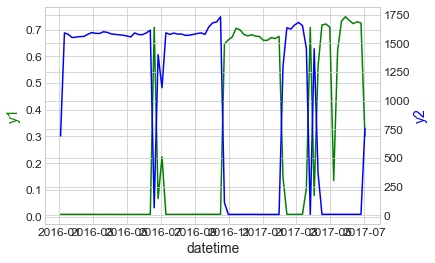

In [26]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(weekly_summary.index, weekly_summary['y1'], 'g-')
ax2.plot(weekly_summary.index, weekly_summary['y2'], 'b-')

ax1.set_xlabel('datetime')
ax1.set_ylabel('y1', color='g')
ax2.set_ylabel('y2', color='b')
plt.show()
plt.rcParams['figure.figsize'] = 16,6

In [27]:
# Anual summary
annual_summary = pd.DataFrame()
# AS is year-start frequency
annual_summary['y1'] = df1.y1.resample('AS').mean()
annual_summary['y2'] = df1.y1.resample('AS').sum()
annual_summary['x1'] = df1.x1.resample('AS').last()
annual_summary

,y1,y2,x1
datetime,,,
2016-01-01,0.165738,17470.076373,0.927859
2017-01-01,0.460188,24115.680713,0.946880


In [28]:
# What was the longest phone y1 entry?
df1['y1'].max()

1.0

In [29]:
#df1['y2'][df1['x4'] == 'x6'].sum()
## Number of non-null unique network entries
df1['y1'].nunique()

# calculate the percent of non-null values
df1['y1'].nunique()/df['y1'].count() # 22% nul values

0.7749369207166313

In [30]:
## Number of non-null unique network entries
df1['y2'].nunique()

# calculate the percent of non-null values
df1['y2'].nunique()/df['y2'].count() # 17% nul values

0.8314737095690322

In [31]:
#df1.groupby(by='datetime').count()
#df.groupby(['x1', 'x2'])['Description'].count()

In [32]:
## Split into Date and Time
df['Dates'] = pd.to_datetime(df['Description']).dt.date

df['Time'] = pd.to_datetime(df['Description']).dt.time

## Organiza\e the columns
df3 = df[['Time', 'Dates', 'y1', 'y2', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']]
# df - has time and date combined
df3.head(2)

,Time,Dates,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
0,00:00:00,2016-01-01,0.008133,0.805288,0.934119,0.182838,0.282637,0.612302,0.218844,0.036615,0.695623,0.286383
1,00:05:00,2016-01-01,0.008964,0.799772,0.934014,0.180689,0.281720,0.611908,0.220869,0.037616,0.693026,0.296014


In [33]:
## Produces Pandas Series
df3.groupby('Dates')['y1'].sum() 

## Produces Pandas DataFrame
df3.groupby('Dates')[['y1']].sum()

,y1
Dates,
2016-01-01,2.414882
2016-01-02,2.419792
2016-01-03,2.404125
2016-01-04,2.408944
2016-01-05,2.377772
2016-01-06,2.386595
2016-01-07,2.373564
2016-01-08,2.354136
2016-01-09,2.377322


In [34]:
# Group the data frame by month and item and extract a number of stats from each group
df3[df3['y1'] == '0.008964'].groupby('Dates').agg(
    # Get max of the duration column for each group
    max_duration=('x1', max),
    # Get min of the duration column for each group
    min_duration=('x1', min),
    # Get sum of the duration column for each group
    total_duration=('x1', sum),
    # Apply a lambda to date column
    num_days=("Dates", lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
Dates,,,,


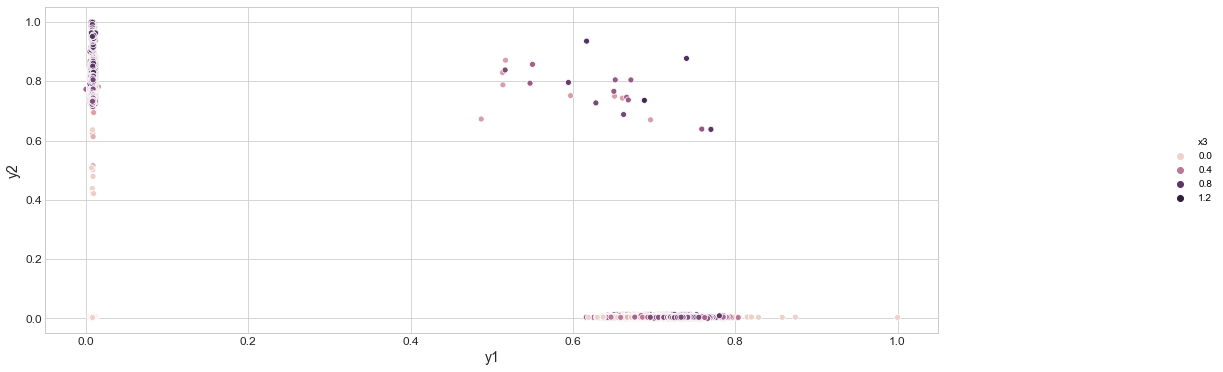

In [35]:
p = sns.scatterplot(x="y1", y="y2", hue="x3", data=df)
p.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
plt.show()

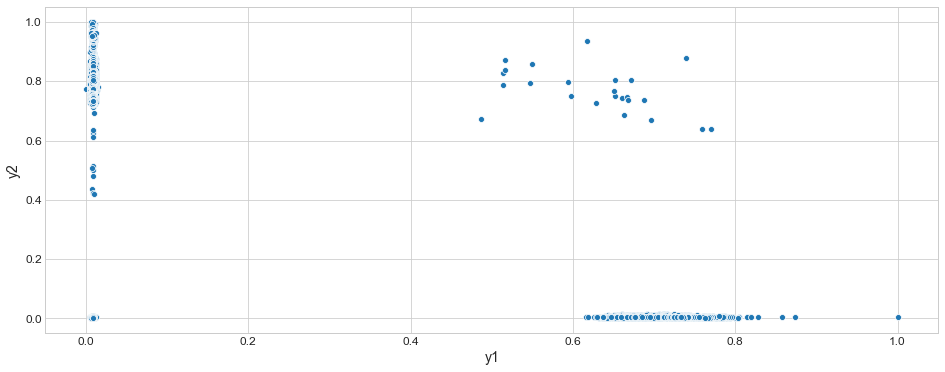

In [36]:
## Look at y1 and y2 relationship
p = sns.scatterplot(x="y1", y="y2", data=df)
plt.show()

#### __3. Find annomalies in the target variables__

First look at y1

In [37]:
# y1 
df1['y1'].describe()

count    157812.000000
mean          0.263515
std           0.333465
min           0.000000
25%           0.008133
50%           0.008906
75%           0.677687
max           1.000000
Name: y1, dtype: float64

In [38]:
print("Skewness: %f" % df1['y1'].skew())
print("Kurtosis: %f" % df1['y1'].kurt())

Skewness: 0.547281
Kurtosis: -1.688474


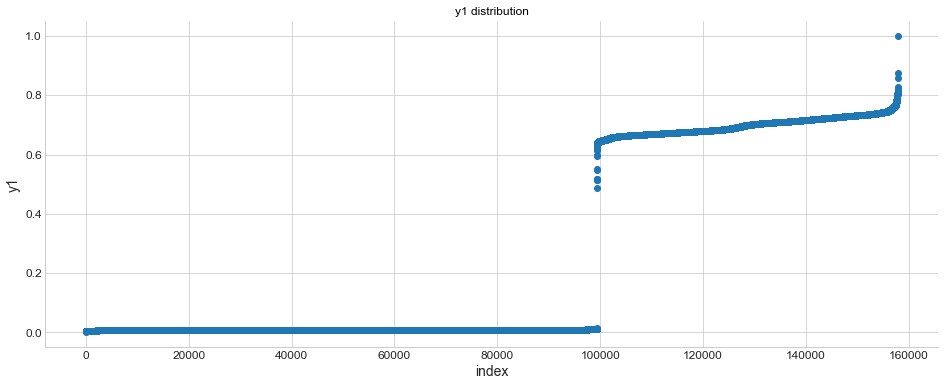

In [39]:
plt.scatter(range(df1.shape[0]), np.sort(df1['y1'].values))
plt.xlabel('index')
plt.ylabel('y1')
plt.title("y1 distribution")
sns.despine()

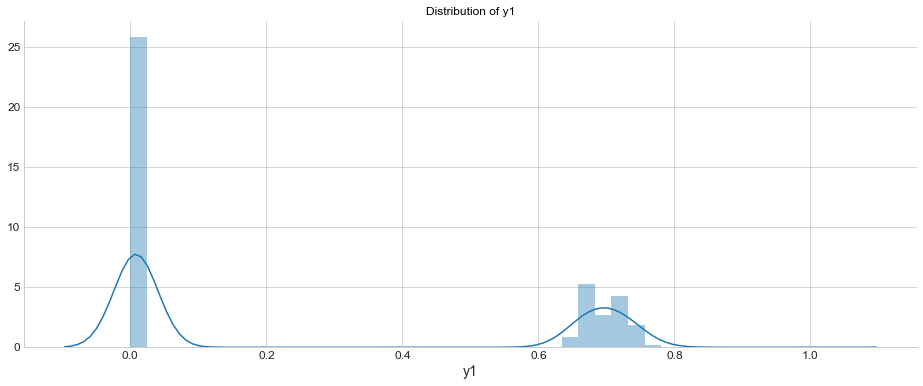

In [40]:
sns.distplot(df1['y1'])
plt.title("Distribution of y1")
sns.despine()

Look at y2

In [41]:
# y2
df1['y2'].describe()

count    157812.000000
mean          0.491774
std           0.383800
min           0.000000
25%           0.004324
50%           0.775731
75%           0.791198
max           1.000000
Name: y2, dtype: float64

In [42]:
print("Skewness: %f" % df1['y2'].skew())
print("Kurtosis: %f" % df1['y2'].kurt())

Skewness: -0.478015
Kurtosis: -1.759296


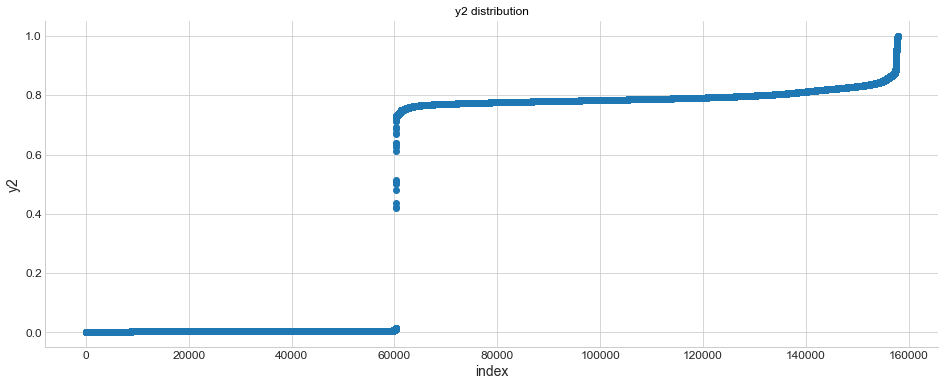

In [43]:
plt.scatter(range(df1.shape[0]), np.sort(df1['y2'].values))
plt.xlabel('index')
plt.ylabel('y2')
plt.title("y2 distribution")
sns.despine()

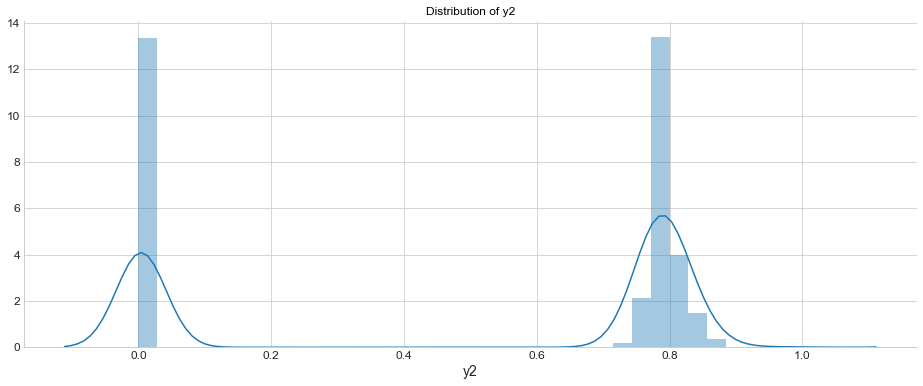

In [44]:
sns.distplot(df1['y2'])
plt.title("Distribution of y2")
sns.despine()

A common reason for the presence of extreme values at the edge of the distribution. Extreme values could be present for a number of reasons, such as:

Measurement error.

Missing data.

Data corruption.

Rare events.

y1 and y2 have a lot of 0 values like we saw earlier.

__*Boxplots*__

Text(0.5, 1.0, 'Y1 Distribution')

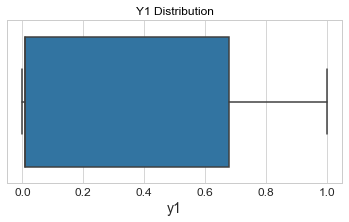

In [45]:
## Plot y1
plt.figure(figsize=(6,3))
sns.boxplot(x=df1['y1'])
# Adding title  
plt.title("Y1 Distribution") 

Text(0.5, 1.0, 'Y2 Distribution')

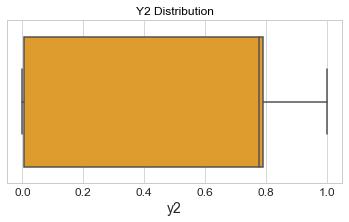

In [46]:
plt.figure(figsize=(6,3))
sns.boxplot(x=df1['y2'], color = "#fca311")
plt.title("Y2 Distribution") 

Looking at the distribution of y1 and y2 no outliers are noticed, clearly not normal distribution. Both of variables have spread of 0 to 1 (range of 1). Both boxplots are skewed (right).

For y1 the median is at 0.008906.


For y1 the median is at 0.775731.

__*Z-score*__

In [47]:
from scipy import stats
z = np.abs(stats.zscore(df1))
print(z)

[[0.76584564 0.81686959 0.09635454 ... 0.09018399 0.48421231 0.458186  ]
 [0.76335206 0.8024965  0.09505397 ... 0.07958988 0.44667539 0.56924678]
 [0.76352792 0.82711064 0.0952612  ... 0.11505461 0.4412915  0.493641  ]
 ...
 [0.76352792 0.61631706 0.27482129 ... 0.01784887 0.40908409 0.12066545]
 [0.76296339 0.63101565 0.25564955 ... 0.00166302 0.45890341 0.04479528]
 [0.76584564 0.62728225 0.25527072 ... 0.01061939 0.42102958 0.05355462]]


In [48]:
threshold = 3
print(np.where(z > 3))

(array([ 44028,  44028,  44029, ..., 144650, 144690, 151101], dtype=int64), array([5, 6, 6, ..., 6, 6, 6], dtype=int64))


In [49]:
print(z[44028][5]) #data point — 44028th record on column ZN is an outlier.

4.116009904199127


In [50]:
df3 = df1[(z < 3).all(axis=1)]

In [51]:
df1.shape

(157812, 10)

In [52]:
df3.shape # remove 2441 outliers, a lot!

(155371, 10)

Bad data, wrong calculation, these can be identified as Outliers and should be dropped but at the same time we might want to correct them too, as they change the level of data i.e. mean which cause issues when we model your data.

__*Isolation Forest*__

Isolation Forest is an algorithm to detect outliers that returns the anomaly score of each sample using the IsolationForest algorithm which is based on the fact that anomalies are data points that are few and different. 

- __*y1*__

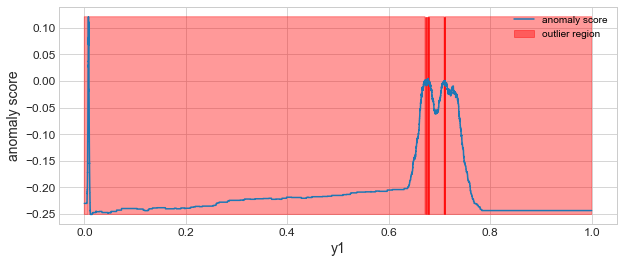

In [53]:
## Univariate Anomaly Detection on y1
# visualization highlights the regions where the outliers fall.
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df1['y1'].values.reshape(-1, 1))
xx = np.linspace(df1['y1'].min(), df1['y1'].max(), len(df1)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('y1')
plt.show();

The plot shows that everything over 0 is considered an outlier according to IsolationForest.

In [54]:
## Look at the anomalies
df1.iloc[10]

y1    0.008133
y2    0.796684
x1    0.934091
x2    0.185178
x3    0.283777
x4    0.609452
x5    0.221827
x6    0.032324
x7    0.694224
x8    0.285480
Name: 2016-01-01 00:50:00, dtype: float64

- __*y2*__

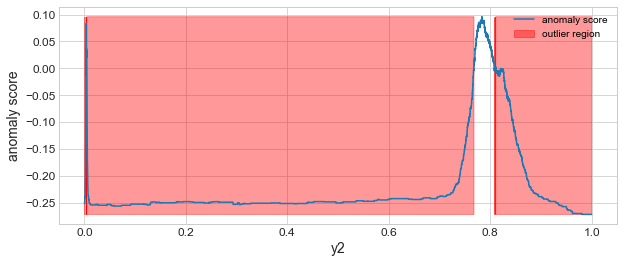

In [55]:
## Univariate Anomaly Detection on y2
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df1['y2'].values.reshape(-1, 1))
xx = np.linspace(df1['y2'].min(), df1['y2'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('y2')
plt.show();

According to the above results and visualization, it seems that y2 values that below -0.78 or exceeds 0.81 would be considered as an outlier.

In [56]:
df1.iloc[9]

y1    0.007969
y2    0.806117
x1    0.934372
x2    0.183060
x3    0.282572
x4    0.613364
x5    0.223763
x6    0.030205
x7    0.695446
x8    0.286310
Name: 2016-01-01 00:45:00, dtype: float64

The above two visualizations show the anomaly scores and highlighted the regions where the outliers are. As expected, the anomaly score reflects the shape of the underlying distribution and the outlier regions correspond to low probability areas.
However, Univariate analysis can only get us thus far. We may realize that some of these anomalies that determined by our models are not the anomalies we expected. When our data is multidimensional as opposed to univariate, the approaches to anomaly detection become more computationally intensive and more mathematically complex.

__*K-means*__

In [57]:
df = pd.read_csv('dataset_for_technical_assessment.csv', parse_dates=['Description'])
df['Date'] = pd.to_datetime(df['Description'], format='%Y-%m-%d %h:%m%s', errors='coerce')
df = df.set_index('Date')

In [58]:
df['Date'] = pd.to_datetime(df['Description'], format='%Y-%m-%d %h:%m%s', errors='coerce')
df = df.set_index('Date')

- with only y1

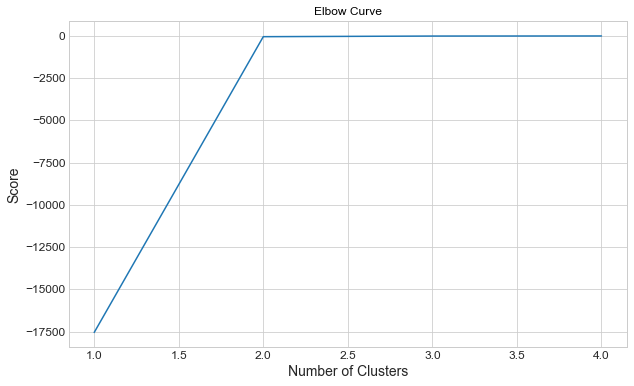

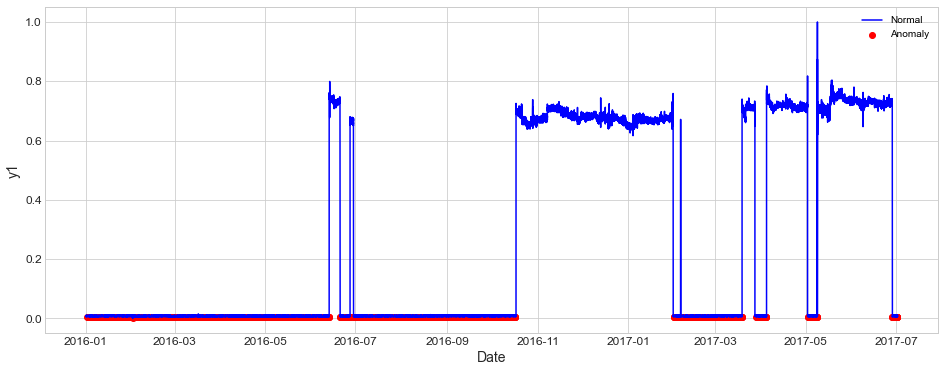

In [59]:
## 1. Find elbow
data = df[['y1']]
data = data.fillna(method='bfill')
n_cluster = range(1, 5)
from sklearn.cluster import KMeans
#import sklearn.cluster.KMeans
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

# Elbow at 2 clusters

## 2. Find anomalies, and label them in df
import numpy as np
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.iloc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i] = np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[2])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = np.array((distance >= threshold).astype(int))

# 3. View anomalies in TS View
fig, ax = plt.subplots(figsize=(16,6))
a = df.loc[df['anomaly1'] == 1, ['y1']] #anomaly
ax.plot(df.index, df['y1'], color='blue', label='Normal')
ax.scatter(a.index, a['y1'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('y1')
plt.legend()
plt.show();

- with only y2

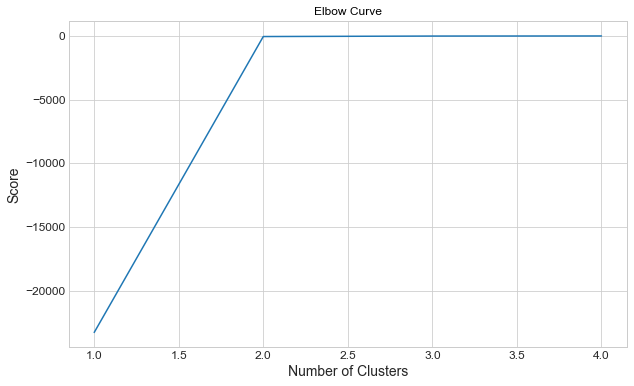

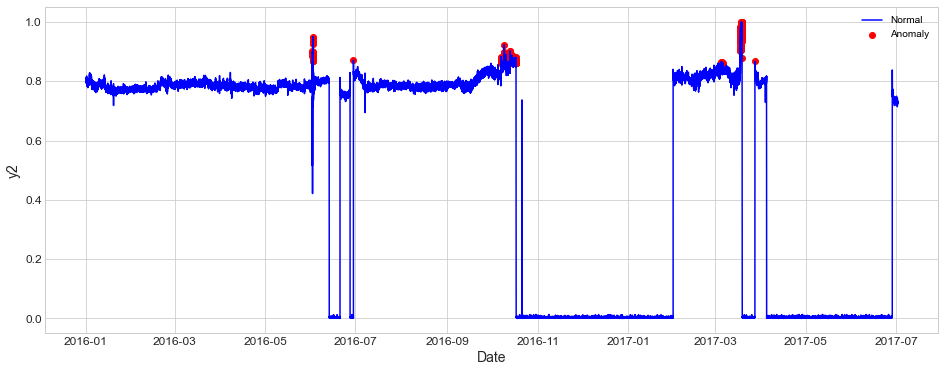

In [60]:
## 1. Find elbow
data = df[['y2']]
data = data.fillna(method='bfill')
n_cluster = range(1, 5)
from sklearn.cluster import KMeans
#import sklearn.cluster.KMeans
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

# Elbow at 2 clusters

## 2. Find anomalies, and label them in df
import numpy as np
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data.iloc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i] = np.linalg.norm(Xa-Xb)
    return distance

outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(data, kmeans[2])
number_of_outliers = int(outliers_fraction*len(distance))
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly2'] = np.array((distance >= threshold).astype(int))

# 3. View anomalies in TS View
fig, ax = plt.subplots(figsize=(16,6))
a = df.loc[df['anomaly2'] == 1, ['y2']] #anomaly
ax.plot(df.index, df['y2'], color='blue', label='Normal')
ax.scatter(a.index, a['y2'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('y2')
plt.legend()
plt.show();

It seems that the anomalies detected by k-means clustering were  some of very high values.

- __Another appraoch anomalie detection in tme series__

In [61]:
#df= df.drop(['Description'], axis=1)
#df.head(2)

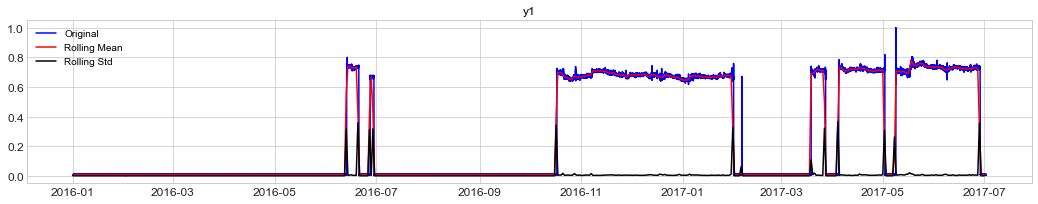

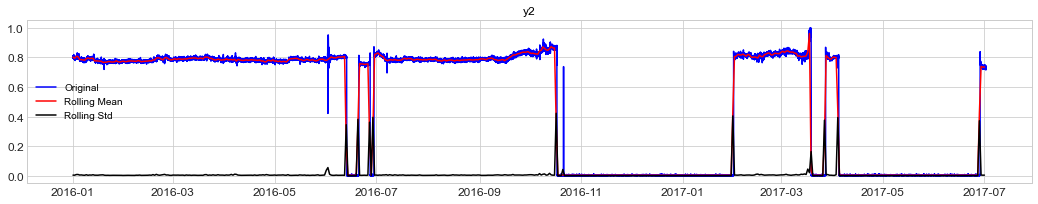

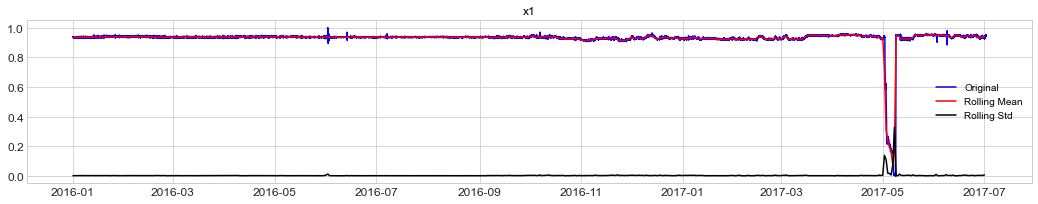

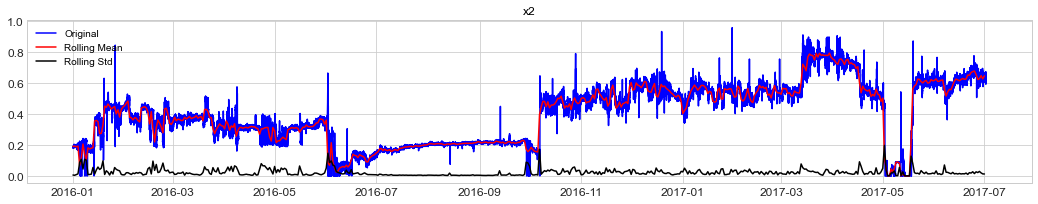

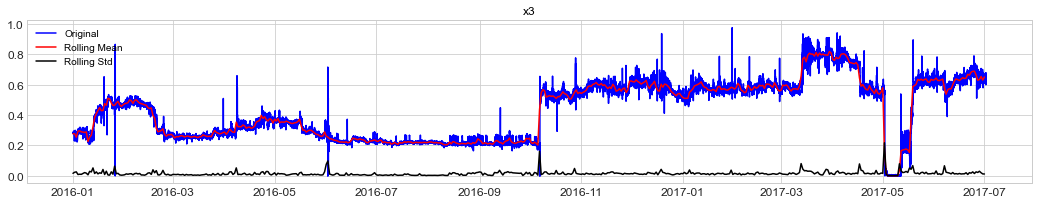

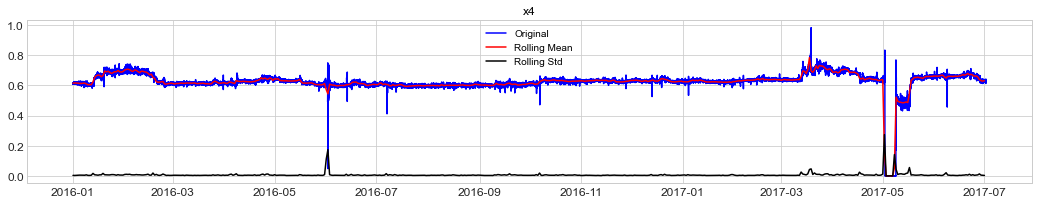

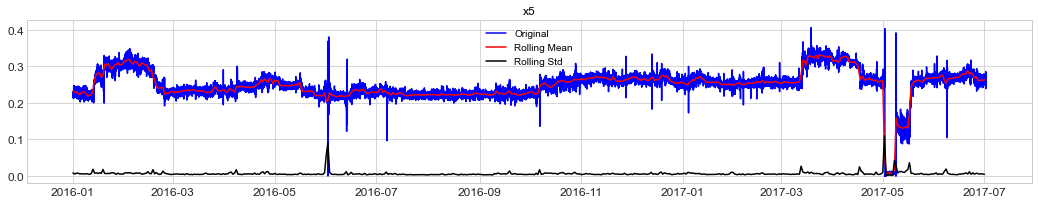

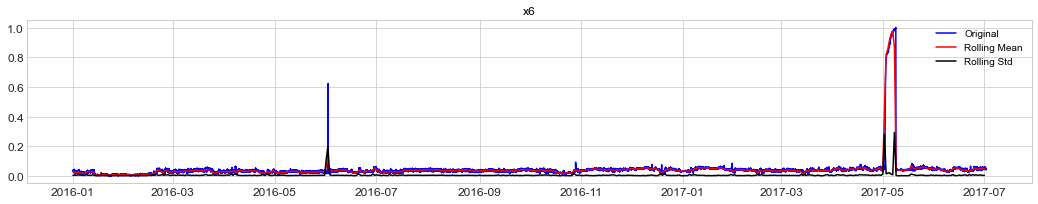

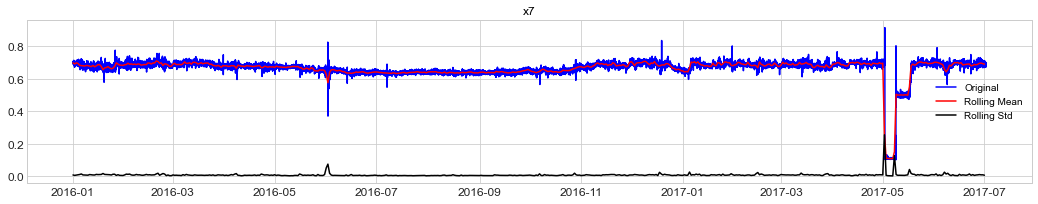

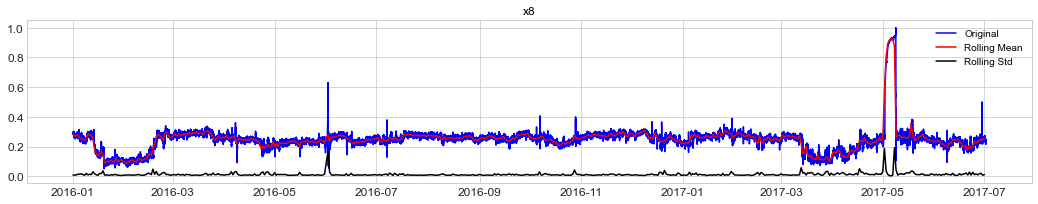

In [64]:
## Resample the entire dataset by daily average
rollmean = df1.resample(rule='D').mean()
rollstd = df1.resample(rule='D').std()

names=df1.columns
## Plot time series for each sensor with its mean and standard deviation

for name in names:
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(df[name], color='blue', label='Original')
    _ = plt.plot(rollmean[name], color='red', label='Rolling Mean')
    _ = plt.plot(rollstd[name], color='black', label='Rolling Std' )
    _ = plt.legend(loc='best')
    _ = plt.title(name)
    plt.show()

For most variables the data actually looks pretty stationary where the rolling mean and standard deviation don’t seem to change over time except during the downtime of the pump which is expected. When the case is that the data is not stationary, various transformation methods must be applied to make the data stationary before training the data.

1. Scale the data

2. Perform PCA and look at the most important principal components based on inertia

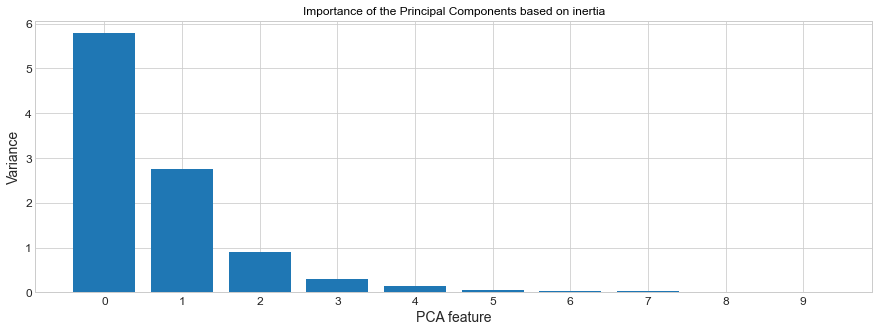

In [65]:
## Standardize/scale the dataset and apply PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

## Extract the names of the numerical columns
x = df1[names]
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(x)
# Plot the principal components against their inertia
features = range(pca.n_components_)
_ = plt.figure(figsize=(15, 5))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('Variance')
_ = plt.xticks(features)
_ = plt.title("Importance of the Principal Components based on inertia")
plt.show()


In [66]:
## Calculate PCA with 2 components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])

In [67]:
df1['pc1']=pd.Series(principalDf['pc1'].values, index=df.index)
df1['pc2']=pd.Series(principalDf['pc2'].values, index=df.index)

In [68]:
## Check for stationary fro those two components
from statsmodels.tsa.stattools import adfuller
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc1'])
# Print p-value
print(result[1]) # <0.05

0.01964013324997074


In [69]:
# Run Augmented Dickey Fuller Test
result = adfuller(principalDf['pc2'])
# Print p-value
print(result[1]) # <0.05

0.001721267968989949


In [70]:
## Check for autocorrelation

# Compute change in daily mean 
pca1 = principalDf['pc1'].pct_change()
# Compute autocorrelation
autocorrelation = pca1.dropna().autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -0.0004661161961780375


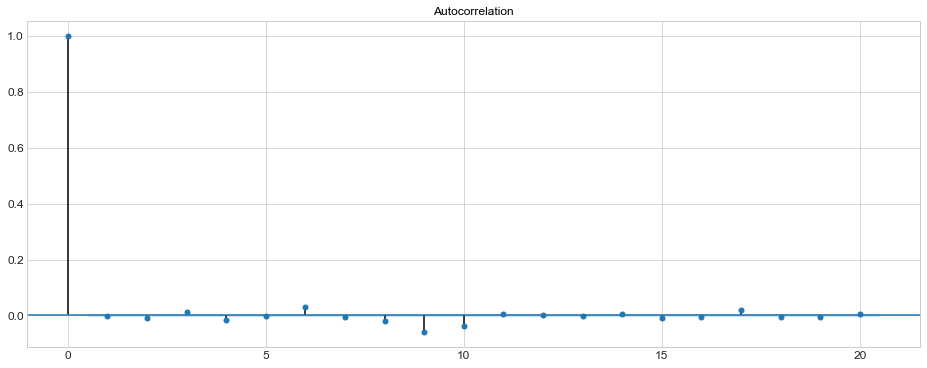

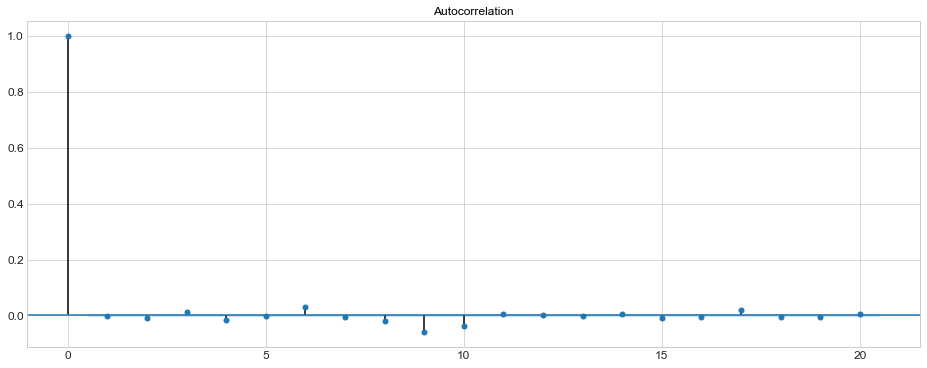

In [71]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca1.dropna(), lags=20, alpha=0.05)

In [72]:
# Compute change in daily mean 
pca2 = principalDf['pc2'].pct_change()
# Compute autocorrelation
autocorrelation = pca2.autocorr()
print('Autocorrelation is: ', autocorrelation)

Autocorrelation is:  -2.0104311516857197e-05


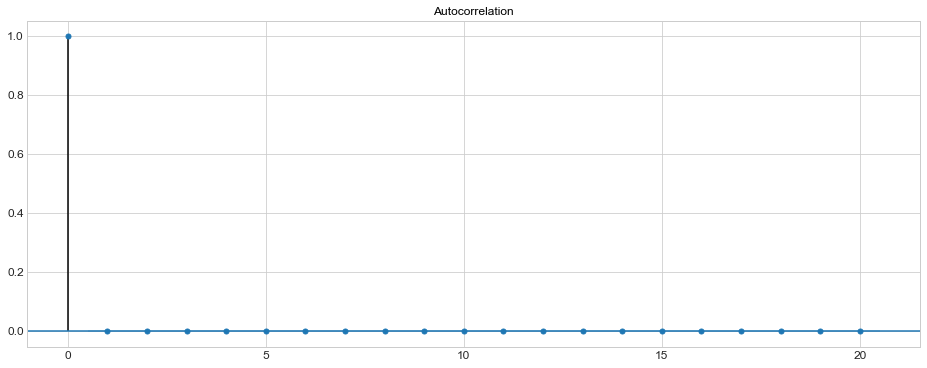

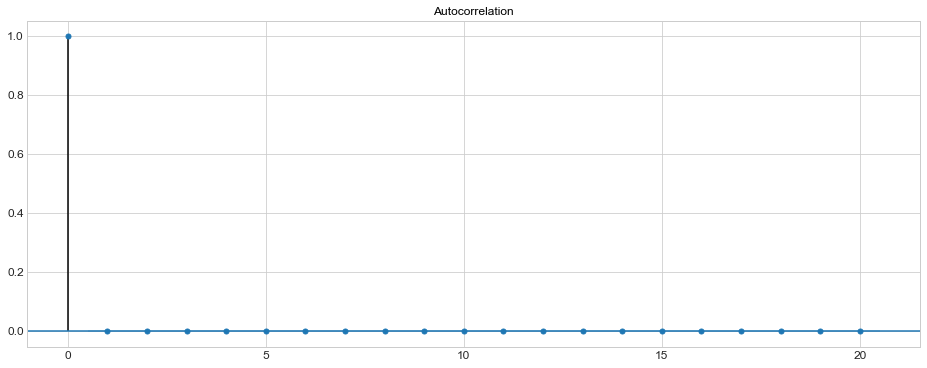

In [73]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(pca2.dropna(), lags=20, alpha=0.05)

New features from PCA are stationary and not autocorrelated.

__MODELING TEHNIQUES TO DETECT ANOMALIES:__
    
Benchmark model: 

Interquartile Range (IQR)

K-Means clustering

Isolation Forest

__IOR__

Anomalies are defined as rare events that could be represented by the outliers in the data set. As an initial step, I want to apply a basic statistics technique to get the feel of the outliers present in this data set. Later, I will compare the results of the other models to the results from the Base Model for further model evaluation.

0: normal

1: anomaly

In [74]:
# outlier_lower = Q1 - (1.5*IQR)
# outlier_upper = Q3 + (1.5*IQR)
# Calculate outlier bounds for pc1
q1_pc1, q3_pc1 = df1['pc1'].quantile([0.25, 0.75])
iqr_pc1 = q3_pc1 - q1_pc1
lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
# Calculate outlier bounds for pc2
q1_pc2, q3_pc2 = df1['pc2'].quantile([0.25, 0.75])
iqr_pc2 = q3_pc2 - q1_pc2
lower_pc2 = q1_pc2 - (1.5*iqr_pc2)
upper_pc2 = q3_pc2 + (1.5*iqr_pc2)

In [75]:
lower_pc1, upper_pc1

(-2.051693129793709, 2.2923192427082966)

In [76]:
lower_pc2, upper_pc2

(-0.41861326914965713, 0.42933164602991725)

In [77]:
df1['anomaly_pc1'] = ((df1['pc1']>upper_pc1) | (df1['pc1']<lower_pc1)).astype('int')
df1['anomaly_pc2'] = ((df1['pc2']>upper_pc2) | (df1['pc2']<lower_pc2)).astype('int')

df1['anomaly_pc1'].value_counts()

0    157812
Name: anomaly_pc1, dtype: int64

In [78]:
df1['anomaly_pc2'].value_counts()

0    147617
1     10195
Name: anomaly_pc2, dtype: int64

In [79]:
outliers_pc1 = df1.loc[(df1['pc1']>upper_pc1) | (df1['pc1']<lower_pc1), 'pc1']
outliers_pc2 = df1.loc[(df1['pc2']>upper_pc2) | (df1['pc2']<lower_pc2), 'pc2']

In [80]:
len(outliers_pc1)/len(df)

0.0

In [81]:
len(outliers_pc2)/len(df)

0.06460218487820951

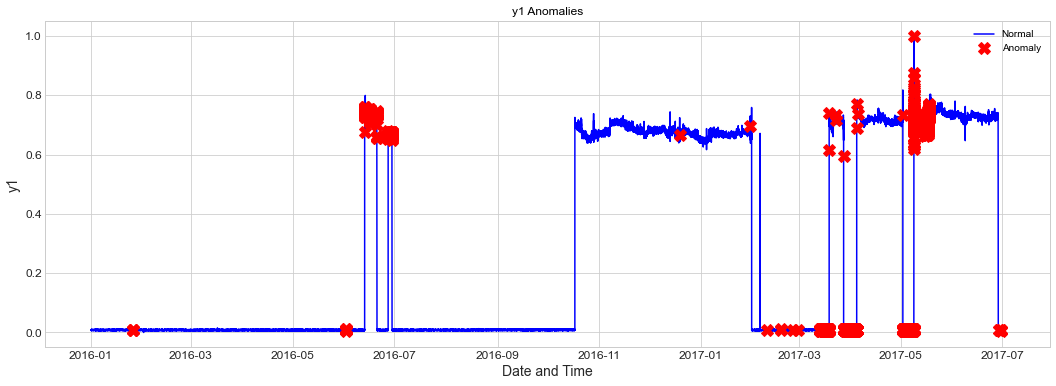

In [82]:
# Let's plot the outliers from pc1 on top of the sensor_11 see where they occured in the time series
a = df1[df1['anomaly_pc2'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df1['y1'], color='blue', label='Normal')
_ = plt.plot(a['y1'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('y1')
_ = plt.title('y1 Anomalies')
_ = plt.legend(loc='best')
plt.show();

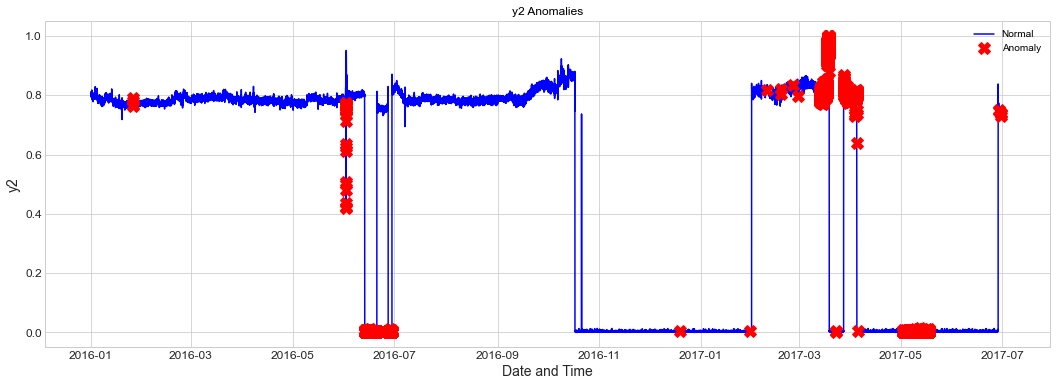

In [83]:
# Let's plot the outliers from pc1 on top of the sensor_11 see where they occured in the time series
a = df1[df1['anomaly_pc2'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df1['y2'], color='blue', label='Normal')
_ = plt.plot(a['y2'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('y2')
_ = plt.title('y2 Anomalies')
_ = plt.legend(loc='best')
plt.show();

__K-MEANS__

Strategy:

The underline assumption in the clustering based anomaly detection is that if we cluster the data, normal data will belong to clusters while anomalies will not belong to any clusters or belong to small clusters. We use the following steps to find and visualize anomalies.

Calculate the distance between each point and its nearest centroid. The biggest distances are considered as anomaly.
We use outliers_fraction to provide information to the algorithm about the proportion of the outliers present in our data set. Situations may vary from data set to data set. However, as a starting figure, I estimate outliers_fraction=0.14 (14% of df are outliers as depicted above).
Calculate number_of_outliers using outliers_fraction.
Set threshold as the minimum distance of these outliers.
The anomaly result of anomaly1 contains the above method Cluster (0:normal, 1:anomaly).
Visualize anomalies with cluster view.
Visualize anomalies with Time Series view.

In [84]:
# Import necessary libraries
from sklearn.cluster import KMeans
# I will start k-means clustering with k=2 as I already know that there are 3 classes of "NORMAL" vs 
# "NOT NORMAL" which are combination of BROKEN" and"RECOVERING"
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(principalDf.values)
labels = kmeans.predict(principalDf.values)
unique_elements, counts_elements = np.unique(labels, return_counts=True)
clusters = np.asarray((unique_elements, counts_elements))

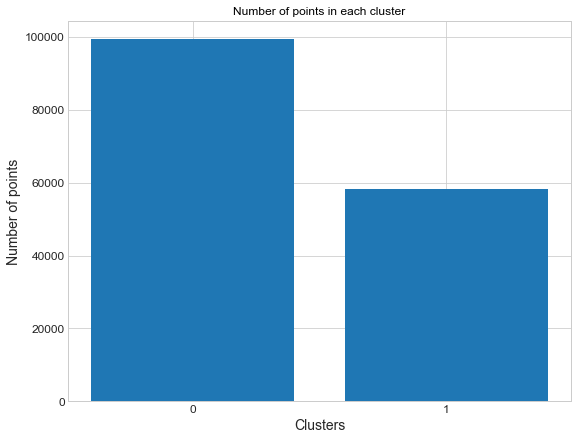

In [85]:
_ = plt.figure(figsize = (9, 7))
_ = plt.bar(clusters[0], clusters[1], tick_label=clusters[0])
_ = plt.xlabel('Clusters')
_ = plt.ylabel('Number of points')
_ = plt.title('Number of points in each cluster')
plt.show()

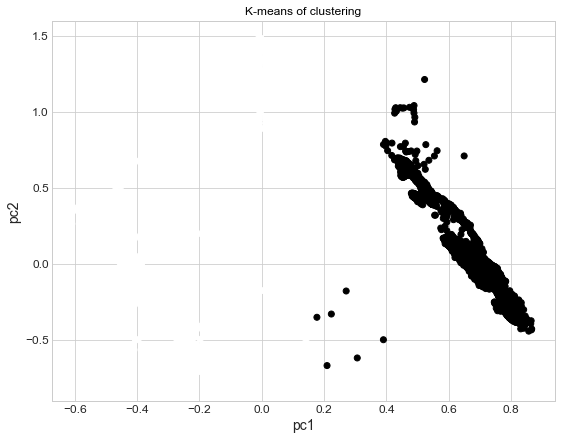

In [86]:
_ = plt.figure(figsize=(9,7))
_ = plt.scatter(principalDf['pc1'], principalDf['pc2'], c=labels)
_ = plt.xlabel('pc1')
_ = plt.ylabel('pc2')
_ = plt.title('K-means of clustering')
plt.show()

In [87]:
# Write a function that calculates distance between each point and the centroid of the closest cluster
def getDistanceByPoint(data, model):
    """ Function that calculates the distance between a point and centroid of a cluster, 
            returns the distances in pandas series"""
    distance = []
    for i in range(0,len(data)):
        Xa = np.array(data.loc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.append(np.linalg.norm(Xa-Xb))
    return pd.Series(distance, index=data.index)

In [88]:
# Assume that 13% of the entire data set are anomalies 
outliers_fraction = 0.13
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance = getDistanceByPoint(principalDf, kmeans)
# number of observations that equate to the 13% of the entire data set
number_of_outliers = int(outliers_fraction*len(distance))
# Take the minimum of the largest 13% of the distances as the threshold
threshold = distance.nlargest(number_of_outliers).min()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
principalDf['anomaly1'] = (distance >= threshold).astype(int)

In [89]:
principalDf['anomaly1'].value_counts()

0    137297
1     20515
Name: anomaly1, dtype: int64

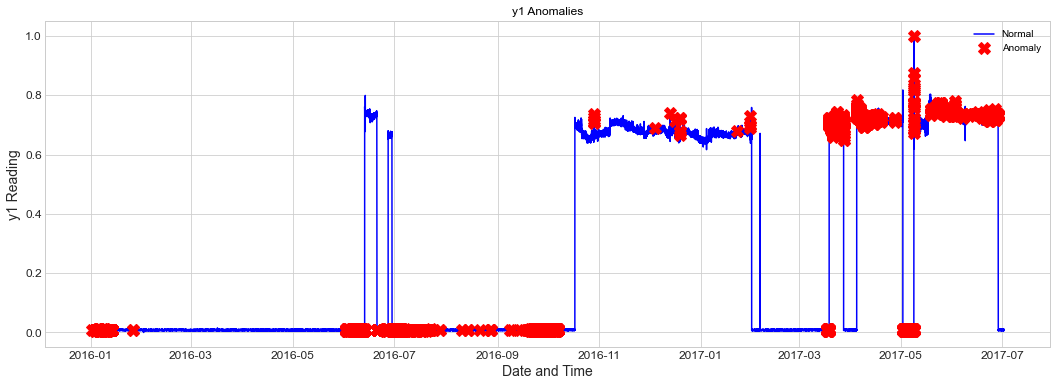

In [90]:
df1['anomaly1'] = pd.Series(principalDf['anomaly1'].values, index=df.index)
a = df1[df1['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['y1'], color='blue', label='Normal')
_ = plt.plot(a['y1'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('y1 Reading')
_ = plt.title('y1 Anomalies')
_ = plt.legend(loc='best')
plt.show();

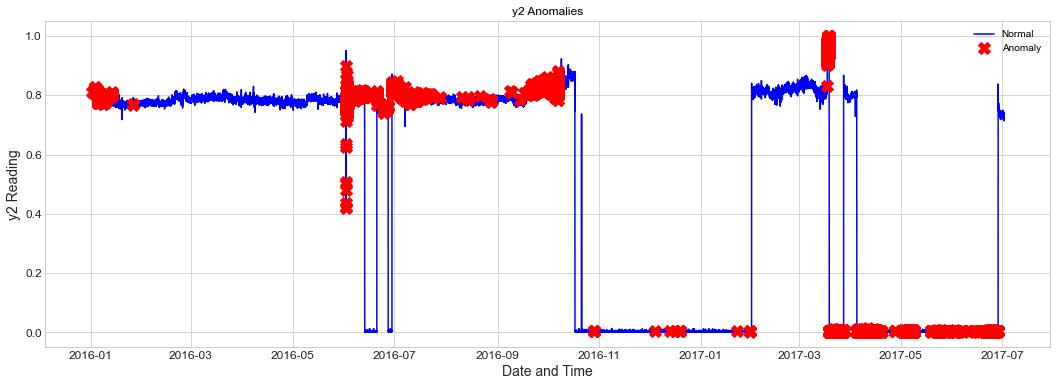

In [91]:
df1['anomaly1'] = pd.Series(principalDf['anomaly1'].values, index=df.index)
a = df1[df1['anomaly1'] == 1] #anomaly
_ = plt.figure(figsize=(18,6))
_ = plt.plot(df['y2'], color='blue', label='Normal')
_ = plt.plot(a['y2'], linestyle='none', marker='X', color='red', markersize=12, label='Anomaly')
_ = plt.xlabel('Date and Time')
_ = plt.ylabel('y2 Reading')
_ = plt.title('y2 Anomalies')
_ = plt.legend(loc='best')
plt.show();

#### __4. Forecasts__

In [372]:
#df1.head(2)

                  y1        y2        x1        x2        x3        x4  \
datetime                                                                 
2016-01-01  0.008385  0.801011  0.934763  0.190546  0.276723  0.614372   
2016-01-02  0.008402  0.793181  0.934907  0.192461  0.276673  0.615811   
2016-01-03  0.008348  0.806529  0.934857  0.187662  0.254651  0.614728   
2016-01-04  0.008364  0.804637  0.935097  0.192376  0.294181  0.614471   
2016-01-05  0.008256  0.785239  0.934597  0.067114  0.296213  0.612324   

                  x5        x6        x7        x8  
datetime                                            
2016-01-01  0.230693  0.030598  0.697399  0.284563  
2016-01-02  0.230170  0.022593  0.690917  0.268821  
2016-01-03  0.229801  0.024969  0.697614  0.277040  
2016-01-04  0.226429  0.025942  0.694022  0.274280  
2016-01-05  0.222133  0.019281  0.682905  0.258131  


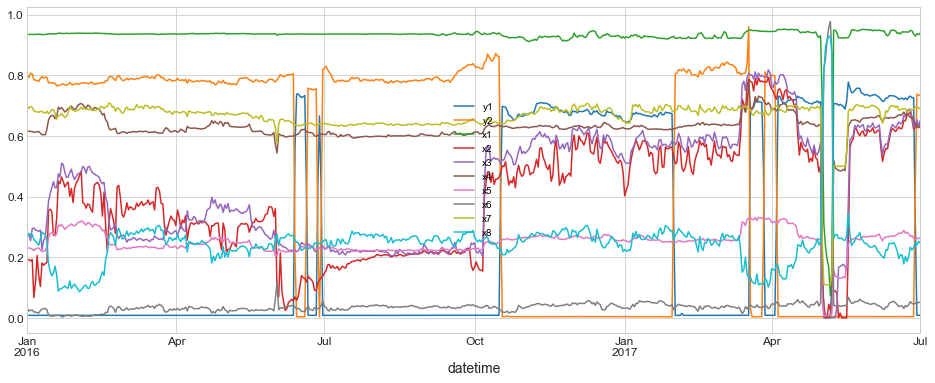

<Figure size 1296x432 with 0 Axes>

In [99]:
## Downsampling the data
df1 = df1.drop(['pc1', 'pc2', 'anomaly_pc1', 'anomaly_pc2', 'anomaly1'], axis = 1)
resample = df1.resample('D')
dayly_mean = resample.mean()
print(dayly_mean.head())
dayly_mean.plot()
plt.figure(figsize=(18,6))
plt.show()

In [100]:
data = dayly_mean.copy() 
data.tail(2)

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
datetime,,,,,,,,,,
2017-06-30,0.008472,0.734250,0.933834,0.626771,0.630424,0.627948,0.261321,0.051398,0.692500,0.252144
2017-07-01,0.008454,0.733926,0.939042,0.646172,0.650342,0.630070,0.263177,0.050745,0.689345,0.247022


-  __AR__

 ***Auto Regressive (AR only) model***

Y1

In [101]:
data_y = data.drop(['y2', 'x1', 'x2','x3','x4','x5','x6','x7','x8'], axis = 1)
#data_y.head(2)

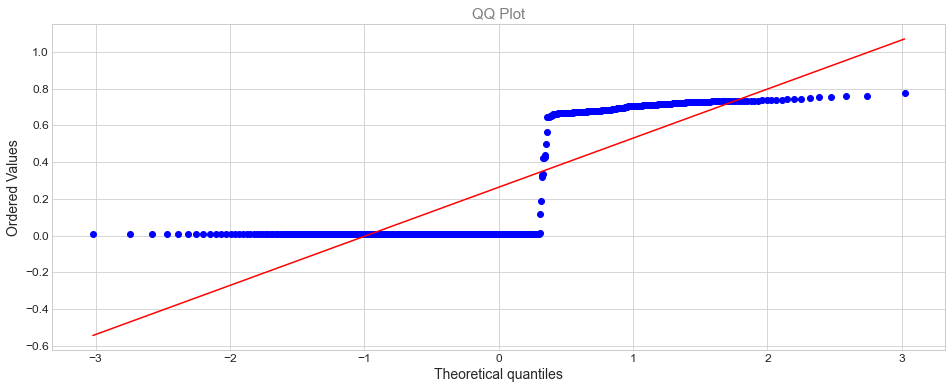

In [102]:
## Check if the time series follow the normal distribution
scipy.stats.probplot(data_y.y1, plot=pylab)
plt.title("QQ Plot", size = 15, color = 'gray')
pylab.show()

A Q-Q plot stands for a "quantile-quantile plot". It is a plot where the axes are purposely transformed in order to make a normal (or Gaussian) distribution appear in a straight line. In other words, a perfectly normal distribution would exactly follow a line with slope = 1 and intercept = 0. In this case, the time series is not following a normal distribution.

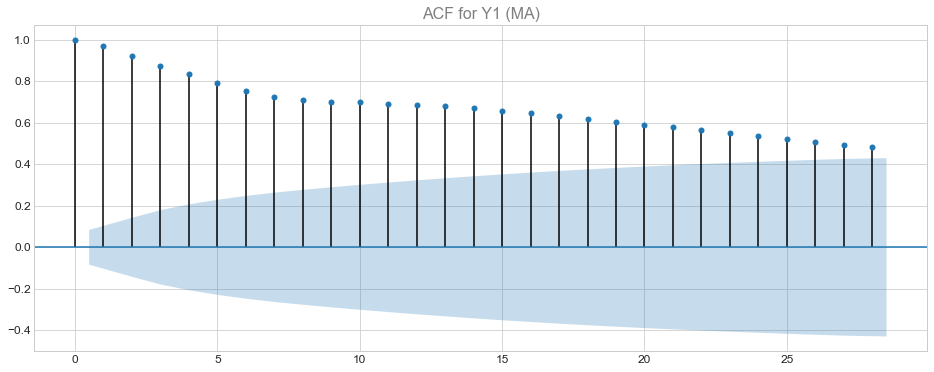

In [103]:
# ACF plot
plot_acf(data_y);
plt.title('ACF for Y1 (MA)', size =16, color = "gray")
plt.show() # it is decreasing

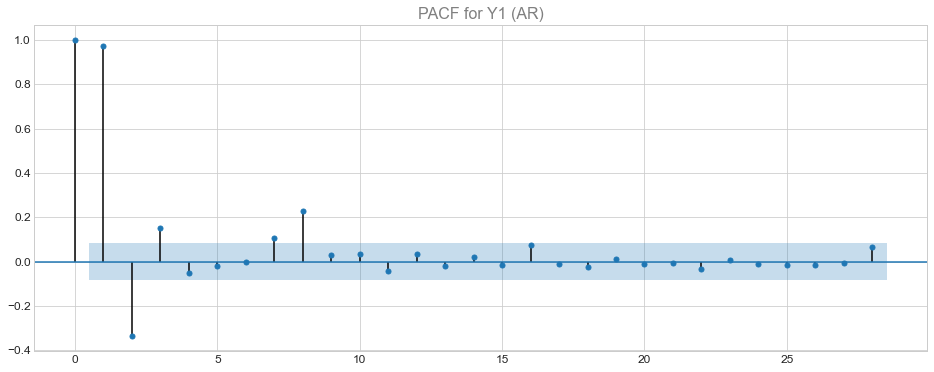

In [104]:
# PACF plot
plot_pacf(data_y, method='ols');
plt.title('PACF for Y1 (AR)', size=16, color = "gray")
plt.show()

The firt 4 are significan, we can use general time series. The trend in the series have to be removed.

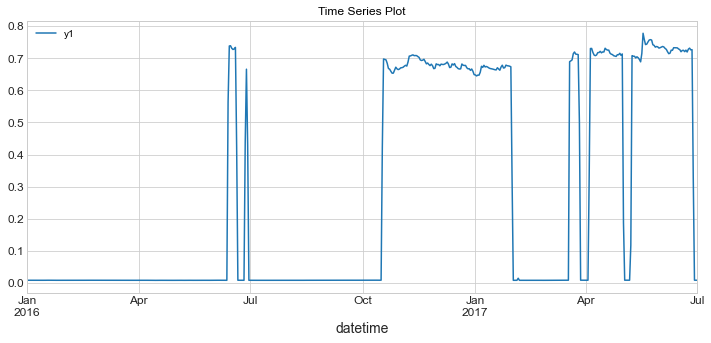

In [105]:
from matplotlib import pyplot
data_y.plot(figsize=(12,5), title='Time Series Plot')
pyplot.show()

In [106]:
## Check the stationarity
# Define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(data_y.y1) #squeeze to get rid of 1 dimension

Results of Dickey-Fuller Test:
Test Statistic                  -2.496772
p-value                          0.116262
#Lags Used                       7.000000
Number of Observations Used    540.000000
Critical Value (1%)             -3.442518
Critical Value (5%)             -2.866907
Critical Value (10%)            -2.569629
dtype: float64


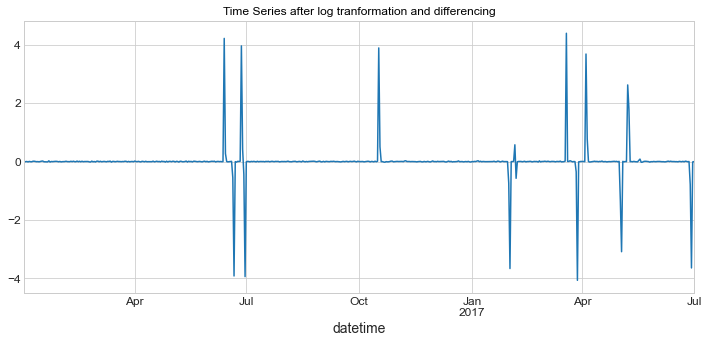

In [107]:
# Differencing 
data_y.y_log = np.log(data_y.y1)
data_y.y_logd = data_y.y_log - data_y.y_log.shift(1)
data_y.y_logd.dropna().plot(figsize=(12,5), title = 'Time Series after log tranformation and differencing')

In [111]:
adf_test(data_y.y_logd.dropna()) #now is stationary

Results of Dickey-Fuller Test:
Test Statistic                -1.117261e+01
p-value                        2.617783e-20
#Lags Used                     7.000000e+00
Number of Observations Used    5.390000e+02
Critical Value (1%)           -3.442541e+00
Critical Value (5%)           -2.866917e+00
Critical Value (10%)          -2.569634e+00
dtype: float64


The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In [109]:
## With the logged 
shift_1=data_y.y_log.shift(1)
AR_df2=pd.concat([data_y.y_log,shift_1], axis=1)
AR_df2=AR_df2[1:]
AR_df2.columns=['Actual_y1','Forecaset_y1']
mse = mean_squared_error(AR_df2.Actual_y1,AR_df2.Forecaset_y1)
rmse=sqrt(mse)
print('The baseline RMSE: {:.3f}'.format(rmse))

The baseline RMSE: 0.575


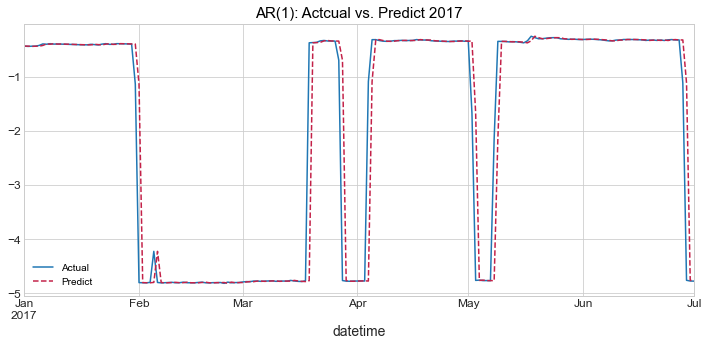

In [110]:
AR_df2.Actual_y1[1:]['2017'].plot(figsize=(12,5), label='Actual');
AR_df2.Forecaset_y1['2017'].plot(figsize=(12,5), label='Predict', color='#C32148', style='--');
plt.title('AR(1): Actcual vs. Predict 2017', size=15)
plt.legend()
plt.show()

Y2

In [373]:
data = dayly_mean.copy() 
data.tail(2)

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
datetime,,,,,,,,,,
2017-06-30,0.008472,0.734250,0.933834,0.626771,0.630424,0.627948,0.261321,0.051398,0.692500,0.252144
2017-07-01,0.008454,0.733926,0.939042,0.646172,0.650342,0.630070,0.263177,0.050745,0.689345,0.247022


In [375]:
data_y2 = data.drop(['y1', 'x1', 'x2','x3','x4','x5','x6','x7','x8'], axis = 1)
#data_y2.head(2)

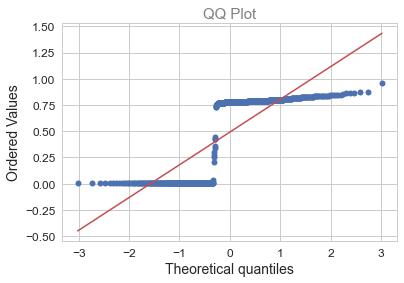

<Figure size 1296x432 with 0 Axes>

In [405]:
## Check if the time series follow the normal distribution
scipy.stats.probplot(data_y2.y2, plot=pylab)
plt.title("QQ Plot", size = 15, color = 'gray')
plt.figure(figsize=(18,6))
pylab.show()

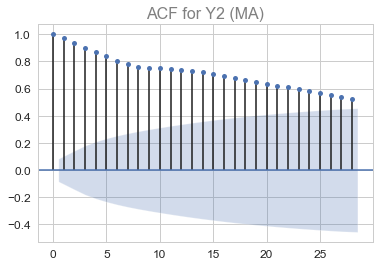

In [395]:
# ACF plot
plot_acf(data_y2);
plt.title('ACF for Y2 (MA)', size =16, color = "gray")
plt.show() # it is decreasing

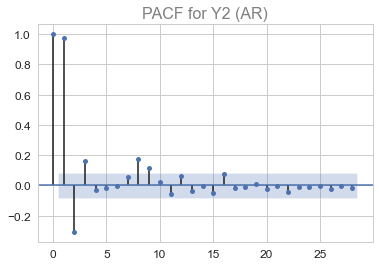

In [396]:
# PACF plot
plot_pacf(data_y2, method='ols');
plt.title('PACF for Y2 (AR)', size=16, color = "gray")
plt.show()

The firt 6 are significan, we can use general time series. The trend in the series have to be removed.

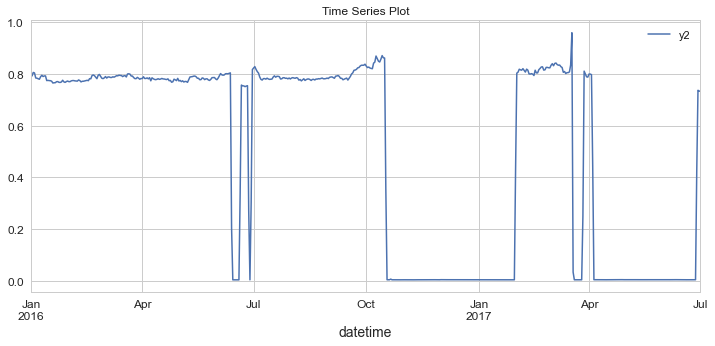

In [397]:
from matplotlib import pyplot
data_y2.plot(figsize=(12,5), title='Time Series Plot')
pyplot.show()

In [398]:
## Check the stationarity
# Define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

#apply adf test on the series
adf_test(data_y2.y2) #squeeze to get rid of 1 dimension

Results of Dickey-Fuller Test:
Test Statistic                  -2.170049
p-value                          0.217295
#Lags Used                       8.000000
Number of Observations Used    539.000000
Critical Value (1%)             -3.442541
Critical Value (5%)             -2.866917
Critical Value (10%)            -2.569634
dtype: float64


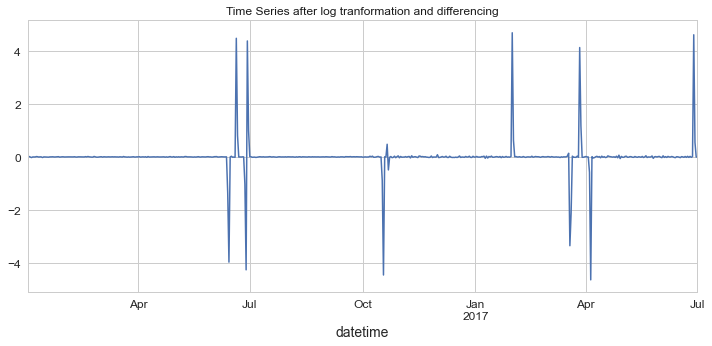

In [399]:
# Differencing 
data_y2.y2_log = np.log(data_y2.y2)
data_y2.y2_logd = data_y2.y2_log - data_y2.y2_log.shift(1)
data_y2.y2_logd.dropna().plot(figsize=(12,5), title = 'Time Series after log tranformation and differencing')


In [400]:
adf_test(data_y2.y2_logd.dropna()) # now is stationary

Results of Dickey-Fuller Test:
Test Statistic                -1.166157e+01
p-value                        1.927803e-21
#Lags Used                     7.000000e+00
Number of Observations Used    5.390000e+02
Critical Value (1%)           -3.442541e+00
Critical Value (5%)           -2.866917e+00
Critical Value (10%)          -2.569634e+00
dtype: float64


In [403]:
## With the logged 
shift_1=data_y2.y2_log.shift(1)
AR_df2=pd.concat([data_y2.y2_log,shift_1], axis=1)
AR_df2=AR_df2[1:]
AR_df2.columns=['Actual_Y2','Forecaset_Y2']
mse = mean_squared_error(AR_df2.Actual_Y2,AR_df2.Forecaset_Y2)
rmse=sqrt(mse)
print('The baseline RMSE: {:.3f}'.format(rmse))

The baseline RMSE: 0.604


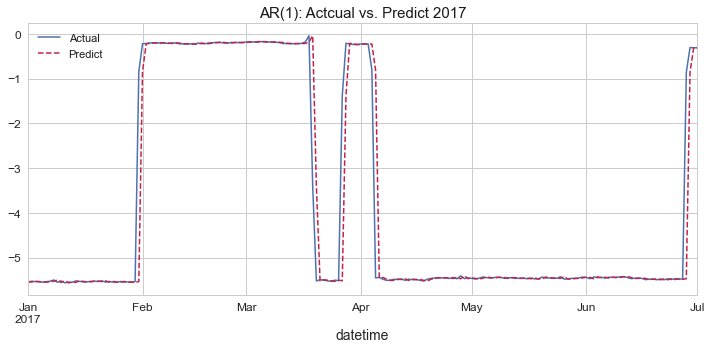

In [404]:
AR_df2.Actual_Y2[1:]['2017'].plot(figsize=(12,5), label='Actual');
AR_df2.Forecaset_Y2['2017'].plot(figsize=(12,5), label='Predict', color='#C32148', style='--');
plt.title('AR(1): Actcual vs. Predict 2017', size=15)
plt.legend()
plt.show()

In [112]:
## Automation of Testing
# Combine it all in one function
def adf_test(timeseries_df):
    print('\tState: {}\n'.format(timeseries_df.columns[0]))

    # Plotting
    timeseries_df.plot(title='Time Series Plot', figsize=(8,5));
    plt.show()
    timeseries_df.hist(figsize=(8,5));
    plt.title('Histogram')
    plt.show()
    timeseries_df.boxplot(flierprops= {'marker':'D', 'markerfacecolor':'g'}, figsize=(8,5), vert=False); 
    plt.title('Box Plot')
    plt.show()
    scipy.stats.probplot(timeseries_df.squeeze(), plot=pylab); #squeeze to get rid of 1 dimension
    plt.title("QQ Plot", size = 12)
    pylab.show()

    # Statistics
    print('Central of tendency:')
    print('{:10}: {}'.format('Mean', timeseries_df.mean()[0]))
    print('{:10}: {}'.format('Median', timeseries_df.median()[0]))
    
    

	State: y2



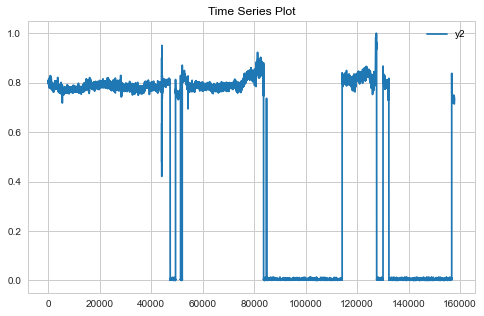

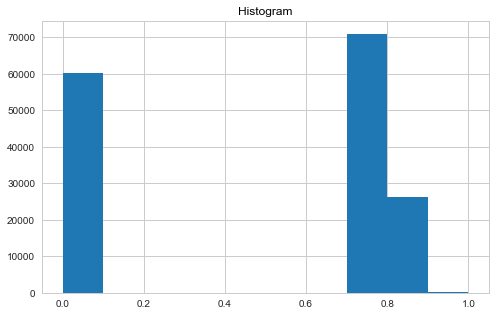

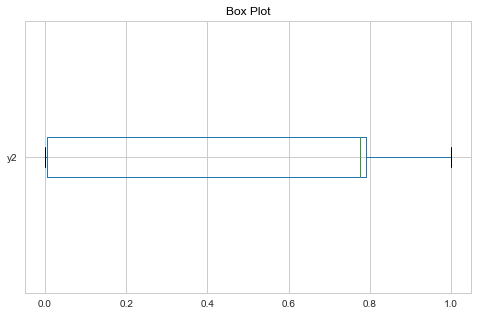

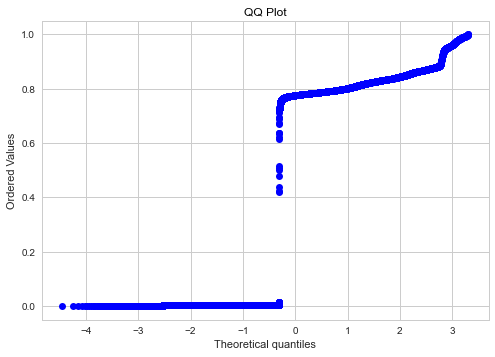

Central of tendency:
Mean      : 0.491873517528943
Median    : 0.7757457752792852


In [113]:
plt.style.use('seaborn-notebook')
adf_test(df2[['y2']].shift(15)[15:])

	State: y1



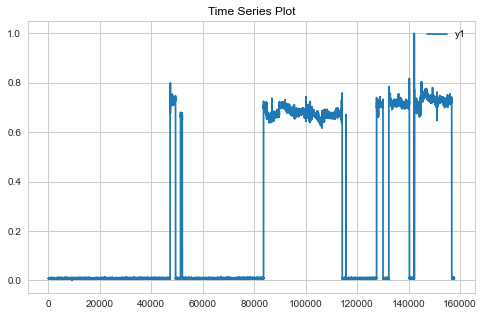

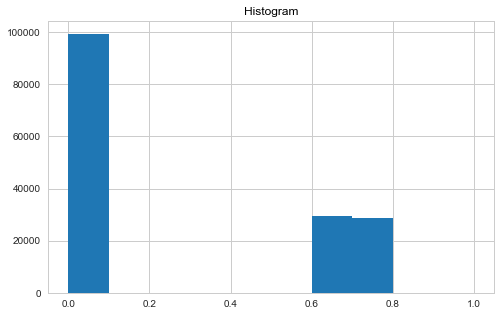

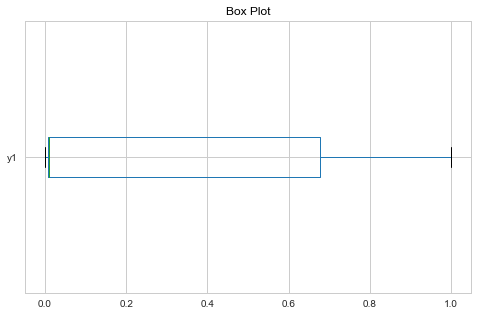

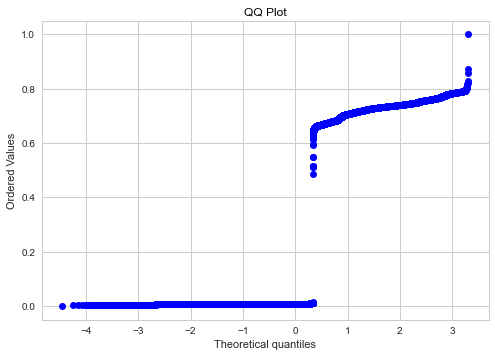

Central of tendency:
Mean      : 0.26357608932590076
Median    : 0.008905625252138609


In [114]:
plt.style.use('seaborn-notebook')
adf_test(df2[['y1']].shift(15)[15:])

- __ARIMA__

In [115]:
## Build train and test set
train = data_y[:len(data_y)-18]
print('Train shape: {}'.format(train.shape))
test = data_y[len(data_y)-18:]
print('Test shape: {}'.format(test.shape))
start_date = '2017-07-02'
end_date = '2017-07-15'

Train shape: (530, 1)
Test shape: (18, 1)


In [116]:
train.shape

(530, 1)

In [117]:
test.shape

(18, 1)

In [118]:
# define a function to run auto arima and search for best model parameters
def find_orders(ts, exog=None):

    stepwise_model = pm.auto_arima(ts, start_p=1, start_q=1, max_p=4, max_q=14,
                                exogenous=exog, 
                                m=12, seasonal=True, stationary=False,
                                stepwise=True, trend='ct',
                                suppress_warnings=True, trace=False, 
                                error_action='ignore')

    return stepwise_model.order, stepwise_model.seasonal_order

def fit_sarimax_model(ts, exog=None, order=(1,1,1), seasonal_order=(0, 0, 0, 12), summary=True, plot=True):
  
    # fit model with exog
    model = sm.tsa.statespace.SARIMAX(ts, 
                                  exog = exog,  
                                  order=order,
                                  seasonal_order=seasonal_order,
                                  trend='ct',
                                  enforce_stationarity=True,
                                  enforce_invertibility=False)

    output = model.fit(d=0)
    
    if summary==True:
        print(output.summary())

    if plot==True:
        # plot model diagnostics
        output.plot_diagnostics(figsize=(15, 18))
        plt.show()
        
    return output

def get_predictions(test, exog, model_output, plot=True, show=True):
    
    # Use the model to forecast twelve months into 2018 and store the confidence intervals
    pred = model_output.get_prediction(start=pd.to_datetime('2019-01-31'), end=pd.to_datetime('2019-12-31'), dynamic=False, exog=exog)
    pred_ci = pred.conf_int()
    
    # Plot the actual results for 2018 vs the projected results. 
    ax = test['2019-01-31':].plot(label='observed')
    pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(8,6))
    
    
    if plot:
        #Plot observed and predicted values with confidence interval
        ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

        ax.set_xlabel('Date')
        ax.set_ylabel('Household Value')
        plt.legend(loc='upper left')
        plt.show()

    
    if show:
        
        # Obtain the predicted mean, merge with the actual values, and compute the MSE. 
        y_pred = pred.predicted_mean.reset_index()
        y_pred.columns = ['date', 'value']
        
        y_test = test.reset_index()
        
        # Compute the mean square error / RMSE
        mse = mean_squared_error(y_test.value, y_pred.value)

        rmse = math.sqrt(mse)
        r2 = r2_score(y_test.value, y_pred.value)

        # Print the results. 
        print('RMSE: ' +  str(format(round(rmse, 3))))
        print('R-squared: ' + str(format(round(r2, 3))))

def get_future(ds, exog, model_output, plot):

    # Get forecast and confidence interval from base model, by steps 60
    

    #future_1y= model_output.forecast(steps=12, exog=exog)
    future_1y = model_output.get_forecast(steps=12, exog=exog, dynamic=True)
    future_conf_1y = future_1y.conf_int(steps=12)

    if plot: # plot results

        # 1 yr
        ax = ds.plot(label='Observed', figsize=(12, 8))
        future_1y.predicted_mean.plot(ax=ax, label='Forecast')
        ax.fill_between(future_conf_1y.index,
                        future_conf_1y.iloc[:, 0],
                        future_conf_1y.iloc[:, 1], color='k', alpha=.25)
        ax.set_xlabel('Date')
        ax.set_ylabel('Returns')
        ax.set_title('1-Year Forecast')
        ax.legend()
        plt.show()        

    df_out = future_conf_1y
    df_out['yhat'] = future_1y.predicted_mean
    df_out.columns = ['yhat_lower', 'yhat_upper', 'yhat']


    gain_df = pd.DataFrame({'value':df_out['yhat'].values, 'date':df_out.index})
    lastObs = pd.DataFrame({'value':ds.iloc[-1]['value'], 'date':ds.index[-1]}, index=[0])

    # preappend one row from actuals to forecast so that roi can be projected.
    gain_df = pd.concat([ lastObs, gain_df])
    gain_df = gain_df.set_index('date')

    roi = calculate_gain(gain_df, plot=False)

    print('1-Year ROI:')
    print(roi)
    return (df_out)

# function to calculate gain percentage (ROI) on previous 2, 5 and 10 years
# source: https://github.com/gioamorim80/Zillow-Time-Series/blob/master/Module%204%20Final%20Project.ipynb
def calculate_gain(ts, plot=True): 
    
    '''Takes a time series and performs calculations on returns over investments
    for period of 1 year'''
    
    # calculates ROI by taking current value, decreasing investment(value at x steps in past) and 
    # dividing by investment. Multiplies by 100 to get percentage number
    roi_1 = (ts - ts.shift(periods=12))/ts.shift(periods=12)*100
    roi_1.dropna(inplace=True)  

    # plot results
    if plot:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=roi_1.index, y=roi_1.value, name='1-Year Investment',
                                 line_color='deepskyblue'))
        
        fig.update_layout(title_text='ROI',
                          yaxis_title="ROI (%)", 
                          xaxis_rangeslider_visible=False)
        fig.show()
    
    # saves new ts with returns for 1 period
    return roi_1

Granger test, and SARIMAX model evaluation

In [119]:
y1 = df1.iloc[:,0]
def get_forecast(ds, steps):
    orders = find_orders(ds, exog=None) # takes a bit of time, best --> ((1, 1, 1), (1, 0, 1, 12))
    model_output = fit_sarimax_model(ds, None, order=orders[0], seasonal_order=orders[1], summary=False, plot=False)  
    get_future(ds, exog=None, steps=steps, model_output=model_output, plot=True)

In [ ]:
#get_forecast(y1, 14) # memory error

- __Prophet__

Y1

In [120]:
temp = pd.pivot_table(data_y, values=['y1'], index=['datetime'], aggfunc=np.sum)
temp = temp.reset_index()
temp = temp.rename(columns={'datetime': 'ds', 'y1': 'y'})
# prepare expected column names
from pandas import to_datetime
temp['ds']= to_datetime(temp['ds'])
temp.head(2)

,ds,y
0,2016-01-01,0.008385
1,2016-01-02,0.008402


In [121]:
m = Prophet()

m.fit(temp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [122]:
## Create Future dates
future_y = m.make_future_dataframe(periods=14, freq = 'D')

## Predict 
forecast = m.predict(future_y)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

,ds,yhat,yhat_lower,yhat_upper
548,2017-07-02,0.622990,0.285142,0.949178
549,2017-07-03,0.635507,0.329429,0.977152
550,2017-07-04,0.633332,0.308253,0.939012
551,2017-07-05,0.624616,0.304824,0.951901
552,2017-07-06,0.616362,0.305687,0.953261
553,2017-07-07,0.616647,0.291992,0.944168
554,2017-07-08,0.616083,0.294830,0.952270
555,2017-07-09,0.632095,0.298995,0.946684
556,2017-07-10,0.644612,0.325622,0.977403
557,2017-07-11,0.642437,0.322343,0.975854


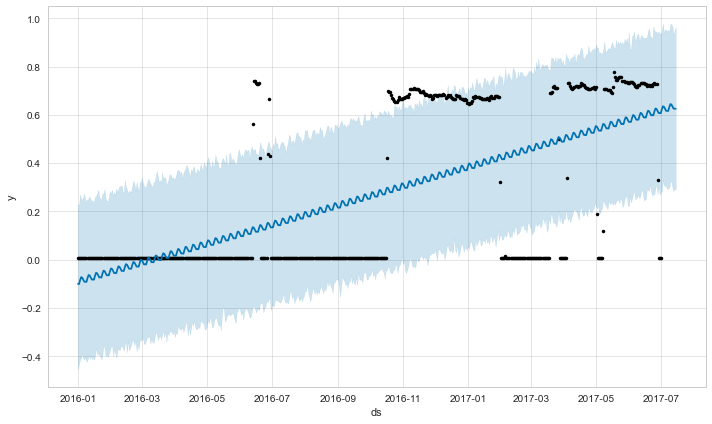

In [123]:
fig = m.plot(forecast)

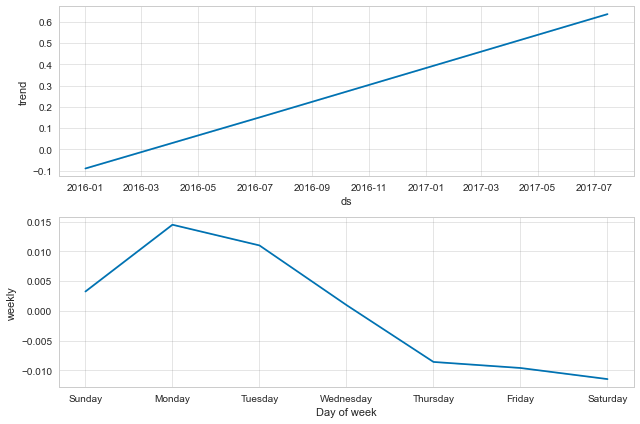

In [124]:
fig2 = m.plot_components(forecast)
plt.show()

In [125]:
## Build a caombined df to check  the accuracy
metric_df = forecast.set_index('ds')[['yhat']].join(temp.set_index('ds').y).reset_index()
metric_df.head()

,ds,yhat,y
0,2016-01-01,-0.099916,0.008385
1,2016-01-02,-0.100498,0.008402
2,2016-01-03,-0.084503,0.008348
3,2016-01-04,-0.072003,0.008364
4,2016-01-05,-0.074196,0.008256


In [126]:
metric_df = metric_df[:-14]
metric_df

,ds,yhat,y
0,2016-01-01,-0.099916,0.008385
1,2016-01-02,-0.100498,0.008402
2,2016-01-03,-0.084503,0.008348
3,2016-01-04,-0.072003,0.008364
4,2016-01-05,-0.074196,0.008256
5,2016-01-06,-0.082929,0.008287
6,2016-01-07,-0.091200,0.008242
7,2016-01-08,-0.090932,0.008174
8,2016-01-09,-0.091514,0.008255
9,2016-01-10,-0.075519,0.008348


In [127]:
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat) #40% 

0.40064901406907516

Y2

In [128]:
data_y2 = data.drop(['y1', 'x1', 'x2','x3','x4','x5','x6','x7','x8'], axis = 1)
#data_y2.head(2)

In [129]:
temp = pd.pivot_table(data_y2, values=['y2'], index=['datetime'], aggfunc=np.sum)
temp = temp.reset_index()
temp = temp.rename(columns={'datetime': 'ds', 'y2': 'y'})
# prepare expected column names
from pandas import to_datetime
temp['ds']= to_datetime(temp['ds'])
temp.head(2)

m = Prophet()
m.fit(temp)

## Create Future dates
future_y = m.make_future_dataframe(periods=14, freq = 'D')

## Predict 
forecast = m.predict(future_y)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(14)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
548,2017-07-02,0.075483,-0.283843,0.431984
549,2017-07-03,0.061903,-0.296508,0.416736
550,2017-07-04,0.064636,-0.318055,0.425710
551,2017-07-05,0.072490,-0.293529,0.434632
552,2017-07-06,0.083485,-0.278083,0.455317
553,2017-07-07,0.082769,-0.283231,0.476740
554,2017-07-08,0.084672,-0.294853,0.446075
555,2017-07-09,0.064967,-0.315501,0.450768
556,2017-07-10,0.051386,-0.285082,0.396037
557,2017-07-11,0.054119,-0.341111,0.409196


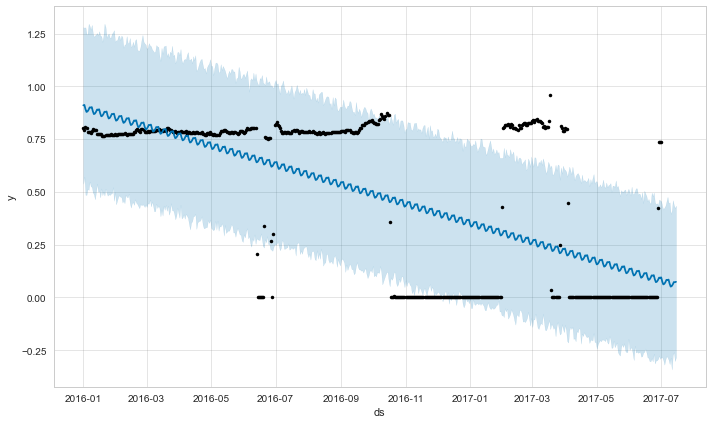

In [130]:
fig = m.plot(forecast)

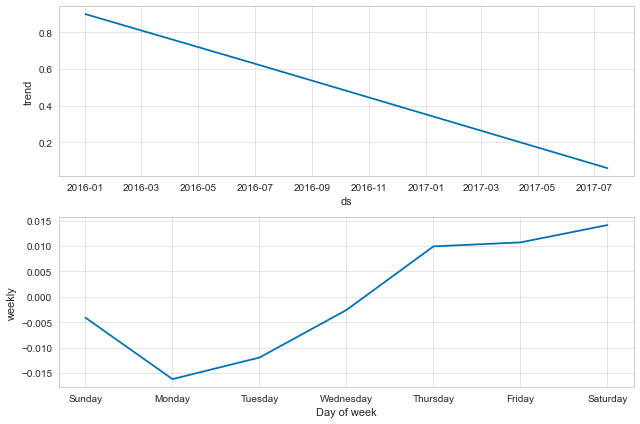

In [131]:
fig2 = m.plot_components(forecast)
plt.show()

In [132]:
## Build a caombined df to check  the accuracy
metric_df = forecast.set_index('ds')[['yhat']].join(temp.set_index('ds').y).reset_index()
metric_df.head()

,ds,yhat,y
0,2016-01-01,0.909918,0.801011
1,2016-01-02,0.911843,0.793181
2,2016-01-03,0.892161,0.806529
3,2016-01-04,0.878603,0.804637
4,2016-01-05,0.881359,0.785239


In [133]:
metric_df = metric_df[:-14]
from sklearn.metrics import r2_score
r2_score(metric_df.y, metric_df.yhat)

0.40458645011178096

- __Multivariate Time Series Analysis__

__Vector Auto Regression (VAR) with only y1 and y2__

VAR model is a stochastic process that represents a group of time-dependent variables as a linear function of their own past values and the past values of all the other variables in the group.

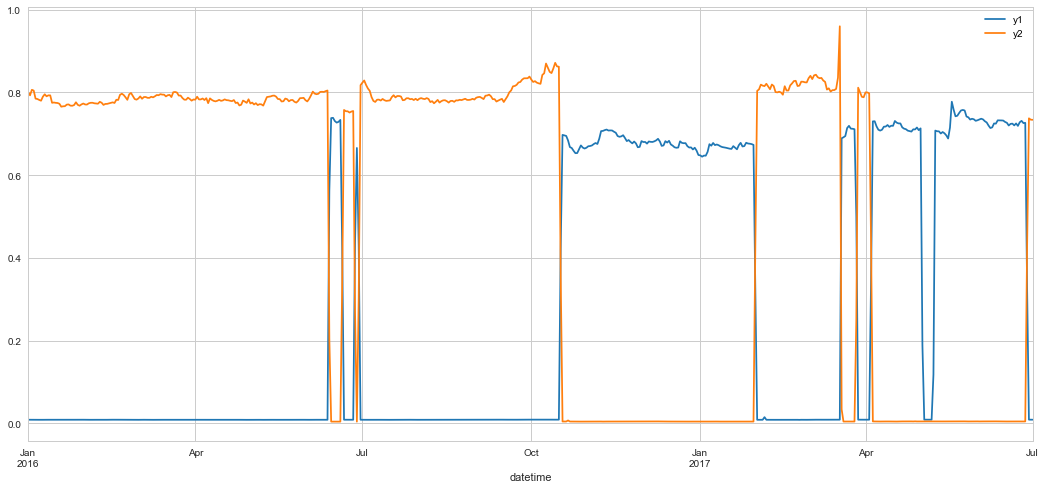

In [134]:
data1 = data[['y1', 'y2']]
#data1.head(2)
data1.plot(figsize = (18,8))

In [135]:
adfuller_test = adfuller(data1['y1'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -2.4967716828522977
p-value: 0.11626178644304686


In [136]:
adfuller_test = adfuller(data1['y2'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -2.170048950860708
p-value: 0.2172949471425777


In [137]:
## Difference to remove the trend
data_d = data1.diff().dropna()

In [138]:
## Check again y1
adfuller_test = adfuller(data_d['y1'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -12.05346369118203
p-value: 2.565451430597603e-22


In [139]:
## Check again y2
adfuller_test = adfuller(data_d['y2'], autolag= "AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -11.128393847208615
p-value: 3.3293658246524216e-20


In [140]:
train = data_d.iloc[:-14,:]
test = data_d.iloc[-14:,:] # keep the last 14 days as a test data

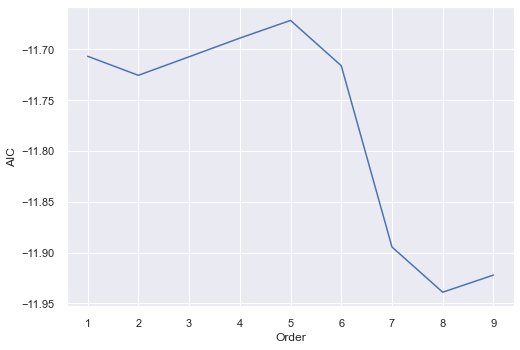

In [141]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

## Choose best order of p
forecasting_model = VAR(train) # train VAR with the training data
results_aic = []
for p in range(1,10): # loop to find the AIC scores for fitting order ranging from 1 to 10
    results = forecasting_model.fit(p)
    results_aic.append(results.aic)
    
## Visualiza the results
sns.set()
plt.plot(list(np.arange(1,10,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

From the plot, the lowest AIC score is achieved at the order of 8. Hence, we select the 8 as the optimal order of the VAR model. Consequently, we fit order 8 to the forecasting model.

In [142]:
results = forecasting_model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Oct, 2020
Time:                     03:42:25
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.6628
Nobs:                     525.000    HQIC:                  -11.8308
Log likelihood:           1678.09    FPE:                6.53126e-06
AIC:                     -11.9390    Det(Omega_mle):     6.12798e-06
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001661         0.003056            0.543           0.587
L1.y1         0.413223         0.094593            4.368           0.000
L1.y2         0.099173         0.086565            1.146           0.252
L2.y1        -0.077787

After fitting the model, forecast for the test data where the last 8 days of training data set as lagged values and steps set as 14 days as we want to forecast for the next 14 days.

In [143]:
laaged_values = train.values[-8:]
laaged_values

array([[ 9.46430170e-03,  6.75111583e-05],
       [-4.31398539e-04,  1.84822428e-05],
       [ 7.98506581e-03, -7.45685507e-05],
       [-2.51378968e-05, -1.17242076e-04],
       [-1.83641378e-04,  3.28400952e-05],
       [-3.01505105e-04,  1.49360687e-05],
       [-3.32737298e-03, -3.14115929e-05],
       [-2.10155704e-03, -1.12911937e-04]])

In [144]:
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=14), index = test.index, columns= ['y1_f', 'y2_f'])
forecast 

,y1_f,y2_f
datetime,,
2017-06-18,0.002762,-0.002392
2017-06-19,-0.000872,-0.002541
2017-06-20,0.003080,-0.002271
2017-06-21,0.002643,-0.002492
2017-06-22,0.002688,-0.002250
2017-06-23,0.003781,-0.002209
2017-06-24,0.002273,-0.001852
2017-06-25,0.001038,-0.001364
2017-06-26,0.002253,-0.001128


To get the original forcasted values have to get one differencing back.

__Vector Auto Regression (VAR) with Granger’s Causality__

In [227]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
df1 = dayly_mean.copy() 
## Look at the data
df1.tail(2)

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
datetime,,,,,,,,,,
2017-06-30,0.008472,0.734250,0.933834,0.626771,0.630424,0.627948,0.261321,0.051398,0.692500,0.252144
2017-07-01,0.008454,0.733926,0.939042,0.646172,0.650342,0.630070,0.263177,0.050745,0.689345,0.247022


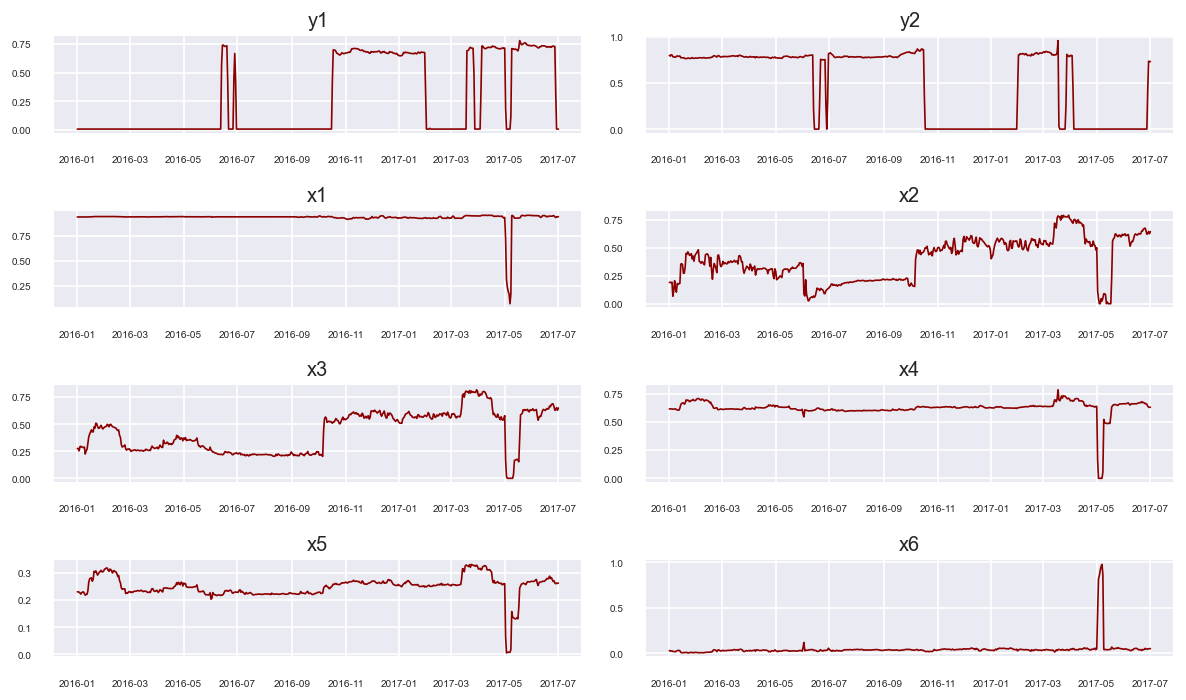

In [228]:
## Visualize the time series
# Plot
fig, axes = plt.subplots(nrows=4, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df1[df1.columns[i]]
    ax.plot(data, color='darkred', linewidth=1)
    # Decorations
    ax.set_title(df1.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [229]:
df1.head(2)

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
datetime,,,,,,,,,,
2016-01-01,0.008385,0.801011,0.934763,0.190546,0.276723,0.614372,0.230693,0.030598,0.697399,0.284563
2016-01-02,0.008402,0.793181,0.934907,0.192461,0.276673,0.615811,0.230170,0.022593,0.690917,0.268821


In [230]:
## Testing Causation using Granger’s Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=18
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df1, variables = df1.columns)  

,y1_x,y2_x,x1_x,x2_x,x3_x,x4_x,x5_x,x6_x,x7_x,x8_x
y1_y,1.0000,0.0002,0.0007,0.0510,0.0113,0.0005,0.0002,0.0006,0.0001,0.0089
y2_y,0.1578,1.0000,0.8107,0.1891,0.0756,0.2310,0.5052,0.5728,0.7880,0.5484
x1_y,0.0000,0.3364,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
x2_y,0.0688,0.3560,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
x3_y,0.1002,0.6217,0.0000,0.0196,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
x4_y,0.6005,0.6923,0.0000,0.0058,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
x5_y,0.6399,0.8102,0.0000,0.0523,0.0001,0.0000,1.0000,0.0000,0.0000,0.0000
x6_y,0.0014,0.2389,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000
x7_y,0.9043,0.8368,0.0000,0.0045,0.0000,0.1008,0.0000,0.0000,1.0000,0.1174
x8_y,0.0006,0.3157,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000


In [231]:
## Cointegration Test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df1)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
y1     ::  406.38    > 219.4051  =>   True
y2     ::  215.05    > 179.5199  =>   True
x1     ::  154.22    > 143.6691  =>   True
x2     ::  108.37    > 111.7797  =>   False
x3     ::  70.39     > 83.9383   =>   False
x4     ::  43.86     > 60.0627   =>   False
x5     ::  24.54     > 40.1749   =>   False
x6     ::  8.74      > 24.2761   =>   False
x7     ::  2.5       > 12.3212   =>   False
x8     ::  0.19      > 4.1296    =>   False


In [232]:
## Test train split 
# The VAR model will be fitted on df_train and then used to forecast the next 4 observations
nobs = 4
df_train, df_test = df1[0:-nobs], df1[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(544, 10)
(4, 10)


In [233]:
## Check for Stationarity 
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [234]:
## Call the function on eah series
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "y1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.1188
 No. Lags Chosen       = 7
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.237. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "y2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.8176
 No. Lags Chosen       = 8
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.3718. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "x1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-S

Only one is not stationary so either we have to drop it or to difference them all.

In [235]:
## 1st difference
df_differenced = df_train.diff().dropna()

In [236]:
## Re-run ADF test on each differenced series
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "y1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.4866
 No. Lags Chosen       = 6
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "y2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.5634
 No. Lags Chosen       = 7
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "x1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test 

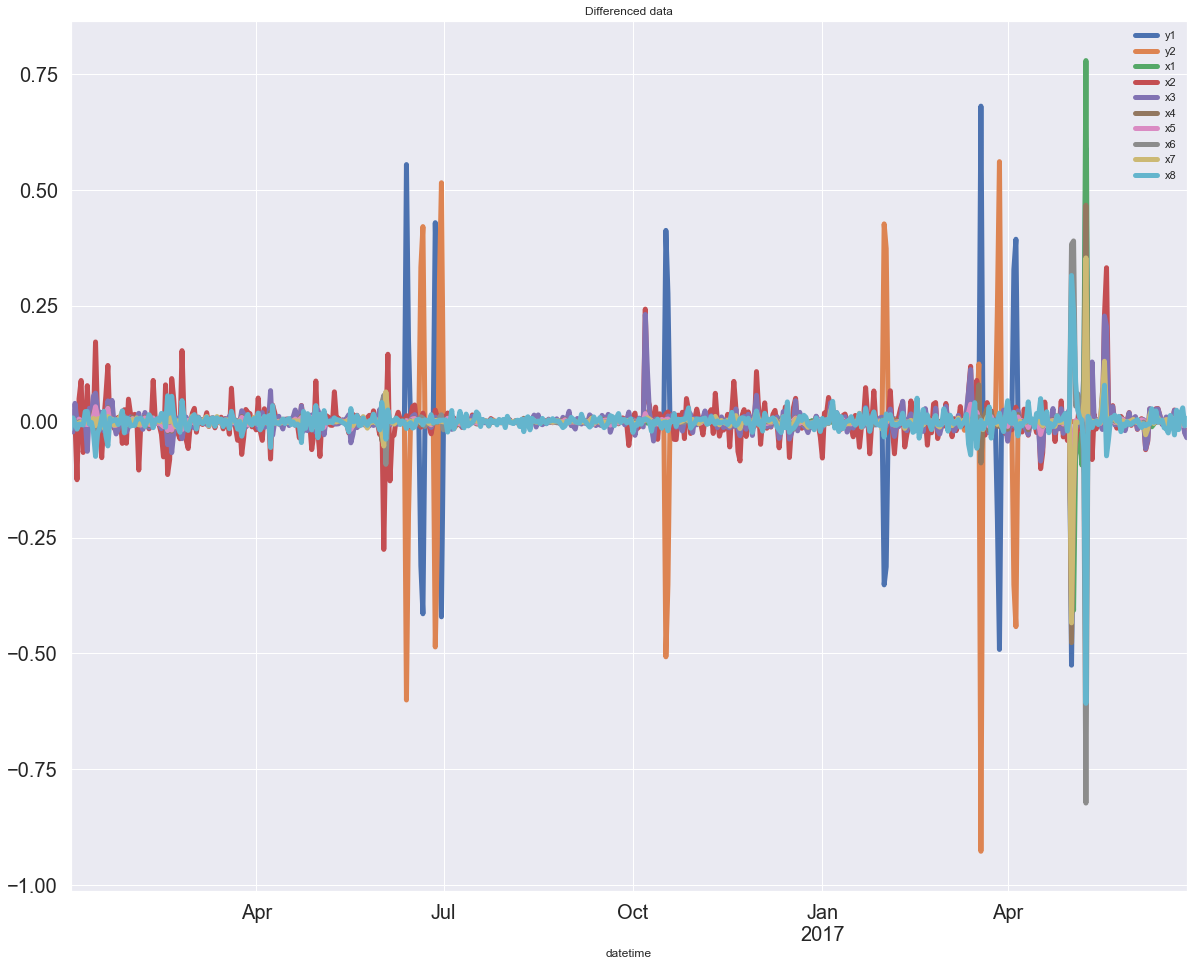

In [237]:
# plotting differenced data
df_differenced.plot(figsize=(20,16), linewidth=5, fontsize=20)
plt.title('Differenced data')
plt.show()

In [238]:
## Pick order of p
model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -85.24551112036168
BIC :  -84.37377816803999
FPE :  9.514130905599504e-38
HQIC:  -84.90463373480823 

Lag Order = 2
AIC :  -85.75090175910799
BIC :  -84.08432495955576
FPE :  5.741508880431331e-38
HQIC:  -85.09916072030579 

Lag Order = 3
AIC :  -85.94724444815671
BIC :  -83.4835658680399
FPE :  4.722096470786382e-38
HQIC:  -84.98370646053323 

Lag Order = 4
AIC :  -86.04348847758496
BIC :  -82.78043952754287
FPE :  4.296022154916809e-38
HQIC:  -84.76721575521087 

Lag Order = 5
AIC :  -86.29201435959261
BIC :  -82.22731572449501
FPE :  3.359959765003082e-38
HQIC:  -84.70206459660712 

Lag Order = 6
AIC :  -86.94732989350351
BIC :  -82.07869146212472
FPE :  1.7519891824518153e-38
HQIC:  -85.0427562342927 

Lag Order = 7
AIC :  -87.5945413114097
BIC :  -81.91966210551367
FPE :  9.22518679716006e-39
HQIC:  -85.37439232053536 

Lag Order = 8
AIC :  -87.85982017424038
BIC :  -81.37638827707073
FPE :  7.131051680151415e-39
HQIC:  -85.3231398061169 

Lag Order = 9
AIC : 

In [239]:
## Another way 
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-83.88,-83.80,3.725e-37,-83.85
1,-85.24,-84.35*,9.611e-38,-84.89
2,-85.74,-84.05,5.811e-38,-85.08
3,-85.95,-83.46,4.699e-38,-84.98
4,-86.02,-82.72,4.415e-38,-84.72
5,-86.26,-82.16,3.454e-38,-84.66
6,-86.95,-82.04,1.749e-38,-85.03
7,-87.61,-81.90,9.051e-39,-85.38
8,-87.89,-81.37,6.893e-39,-85.34
9,-88.37,-81.05,4.316e-39,-85.51*


In [240]:
model_fitted = model.fit(5)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 05, Oct, 2020
Time:                     05:23:42
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -82.2273
Nobs:                     538.000    HQIC:                  -84.7021
Log likelihood:           16088.7    FPE:                3.35996e-38
AIC:                     -86.2920    Det(Omega_mle):     1.35833e-38
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.001079         0.002890            0.373           0.709
L1.y1        -0.141198         0.466289           -0.303           0.762
L1.y2        -0.593812         0.410221           -1.448           0.148
L1.x1         0.320597

In [241]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

5


array([[-5.91960842e-03,  9.19533431e-05, -7.23231971e-04,
         1.72691841e-02,  1.91074490e-02,  3.26301708e-03,
         3.76821250e-03, -3.54465527e-03, -1.12728066e-02,
        -1.71708652e-02],
       [ 8.82762241e-03, -7.06554394e-05,  5.78303003e-05,
         6.32434884e-03,  6.19162198e-03, -5.41432222e-03,
        -5.97883562e-03,  5.90874160e-03,  2.94475379e-03,
         1.76876291e-02],
       [ 3.31266086e-03,  8.50104635e-05,  5.67026016e-03,
         3.71198535e-03,  4.82391122e-04, -7.19473612e-03,
        -8.17192287e-03,  1.04927161e-02,  5.64932943e-03,
         2.97946579e-02],
       [-5.39708652e-03, -6.26056006e-05, -1.41488688e-03,
        -2.24641619e-02, -2.46477710e-02,  2.18383705e-03,
         2.62406479e-03, -6.30953791e-03, -2.38050939e-03,
        -9.02454239e-03],
       [ 6.35693517e-04,  5.24293257e-05, -1.04215415e-02,
        -3.26623232e-02, -3.45752393e-02, -7.23833759e-03,
        -8.40132108e-03, -2.16788493e-03,  3.73739947e-03,
         7.

In [245]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)

df_forecast = pd.DataFrame(fc, index=df1.index[-nobs:], columns=df1.columns + '_1d')
df_forecast

,y1_1d,y2_1d,x1_1d,x2_1d,x3_1d,x4_1d,x5_1d,x6_1d,x7_1d,x8_1d
datetime,,,,,,,,,,
2017-06-28,0.040302,-0.028500,0.027871,-0.023392,-0.015212,0.011395,0.001025,-0.030549,0.003828,-0.022729
2017-06-29,0.000074,-0.002752,0.007156,-0.014302,-0.007984,-0.004048,-0.002142,-0.002607,0.000758,0.005560
2017-06-30,-0.041127,0.037377,-0.015041,0.010177,-0.007726,-0.012180,-0.006366,0.018386,-0.006633,0.019417
2017-07-01,0.005359,-0.001135,0.003984,-0.007784,0.006147,0.003484,0.001609,-0.007761,0.001347,-0.007166


In [260]:
## Invert the differencing 
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [347]:
"""df_results = invert_transformation(train, df_forecast, second_diff=False)   
#df_results.isna().sum()
df_results.loc[:, ['y1_forecast', 'y2_forecast']]"""

"df_results = invert_transformation(train, df_forecast, second_diff=False)   \n#df_results.isna().sum()\ndf_results.loc[:, ['y1_forecast', 'y2_forecast']]"

In [330]:
"""## Plot the forcast vs actuals
fig, axes = plt.subplots(nrows=int(len(df1.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df1.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();"""

'## Plot the forcast vs actuals\nfig, axes = plt.subplots(nrows=int(len(df1.columns)/2), ncols=2, dpi=150, figsize=(10,10))\nfor i, (col,ax) in enumerate(zip(df1.columns, axes.flatten())):\n    df_results[col+\'_forecast\'].plot(legend=True, ax=ax).autoscale(axis=\'x\',tight=True)\n    df_test[col][-nobs:].plot(legend=True, ax=ax);\n    ax.set_title(col + ": Forecast vs Actuals")\n    ax.xaxis.set_ticks_position(\'none\')\n    ax.yaxis.set_ticks_position(\'none\')\n    ax.spines["top"].set_alpha(0)\n    ax.tick_params(labelsize=6)\n\nplt.tight_layout();'

In [329]:
"""from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: rgnp')
accuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: pgnp')
accuracy_prod = forecast_accuracy(df_results['pgnp_forecast'].values, df_test['pgnp'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: ulc')
accuracy_prod = forecast_accuracy(df_results['ulc_forecast'].values, df_test['ulc'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfco')
accuracy_prod = forecast_accuracy(df_results['gdfco_forecast'].values, df_test['gdfco'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdf')
accuracy_prod = forecast_accuracy(df_results['gdf_forecast'].values, df_test['gdf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfim')
accuracy_prod = forecast_accuracy(df_results['gdfim_forecast'].values, df_test['gdfim'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfcf')
accuracy_prod = forecast_accuracy(df_results['gdfcf_forecast'].values, df_test['gdfcf'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: gdfce')
accuracy_prod = forecast_accuracy(df_results['gdfce_forecast'].values, df_test['gdfce'])
for k, v in accuracy_prod.items():
    print(adjust(k), ': ', round(v,4))"""

"from statsmodels.tsa.stattools import acf\ndef forecast_accuracy(forecast, actual):\n    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE\n    me = np.mean(forecast - actual)             # ME\n    mae = np.mean(np.abs(forecast - actual))    # MAE\n    mpe = np.mean((forecast - actual)/actual)   # MPE\n    rmse = np.mean((forecast - actual)**2)**.5  # RMSE\n    corr = np.corrcoef(forecast, actual)[0,1]   # corr\n    mins = np.amin(np.hstack([forecast[:,None], \n                              actual[:,None]]), axis=1)\n    maxs = np.amax(np.hstack([forecast[:,None], \n                              actual[:,None]]), axis=1)\n    minmax = 1 - np.mean(mins/maxs)             # minmax\n    return({'mape':mape, 'me':me, 'mae': mae, \n            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})\n\nprint('Forecast Accuracy of: rgnp')\naccuracy_prod = forecast_accuracy(df_results['rgnp_forecast'].values, df_test['rgnp'])\nfor k, v in accuracy_prod.items():\n    print(adjust

In [359]:
data = dayly_mean.copy() 
data.tail()

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
datetime,,,,,,,,,,
2017-06-27,0.726607,0.004203,0.936408,0.622410,0.628953,0.655233,0.263044,0.045142,0.688876,0.231314
2017-06-28,0.328588,0.425426,0.929418,0.628102,0.633520,0.638147,0.260580,0.048867,0.694799,0.248357
2017-06-29,0.008585,0.737494,0.937095,0.647248,0.653057,0.630572,0.263030,0.046626,0.696001,0.241133
2017-06-30,0.008472,0.734250,0.933834,0.626771,0.630424,0.627948,0.261321,0.051398,0.692500,0.252144
2017-07-01,0.008454,0.733926,0.939042,0.646172,0.650342,0.630070,0.263177,0.050745,0.689345,0.247022


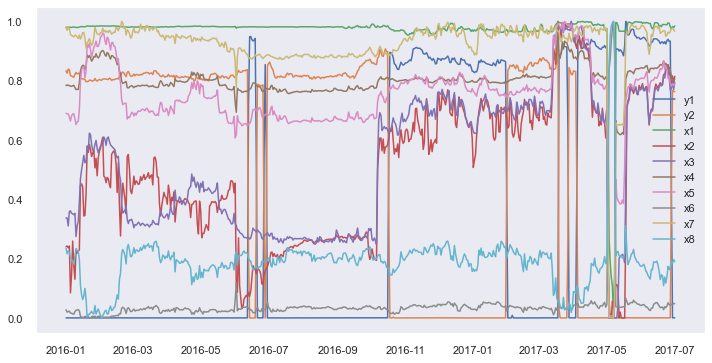

In [360]:
scaler = MinMaxScaler(feature_range=(0, 1))
sdf_np = scaler.fit_transform(data)  
sdf = DataFrame(sdf_np, columns=data.columns, index=data.index)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(sdf)
plt.legend(sdf.columns)
plt.show()

In [361]:
## Call the function on eah series
# ADF Test on each column
for name, column in data.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "y1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.4968
 No. Lags Chosen       = 7
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.1163. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "y2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.17
 No. Lags Chosen       = 8
 Critical value 1%     = -3.443
 Critical value 5%     = -2.867
 Critical value 10%    = -2.57
 => P-Value = 0.2173. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "x1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-St

Glimpse of differenced data:
                  y1        y2        x1        x2        x3        x4  \
datetime                                                                 
2016-01-02  0.000017 -0.007830  0.000144  0.001915 -0.000050  0.001440   
2016-01-03 -0.000054  0.013349 -0.000049 -0.004800 -0.022022 -0.001084   
2016-01-04  0.000017 -0.001892  0.000240  0.004715  0.039530 -0.000257   
2016-01-05 -0.000108 -0.019398 -0.000500 -0.125263  0.002032 -0.002147   
2016-01-06  0.000031 -0.000979  0.000041  0.049592 -0.006622  0.000205   

                  x5        x6        x7        x8  
datetime                                            
2016-01-02 -0.000523 -0.008005 -0.006482 -0.015742  
2016-01-03 -0.000369  0.002376  0.006697  0.008219  
2016-01-04 -0.003372  0.000973 -0.003592 -0.002760  
2016-01-05 -0.004296 -0.006662 -0.011117 -0.016148  
2016-01-06  0.005644 -0.000080 -0.002526 -0.005221  


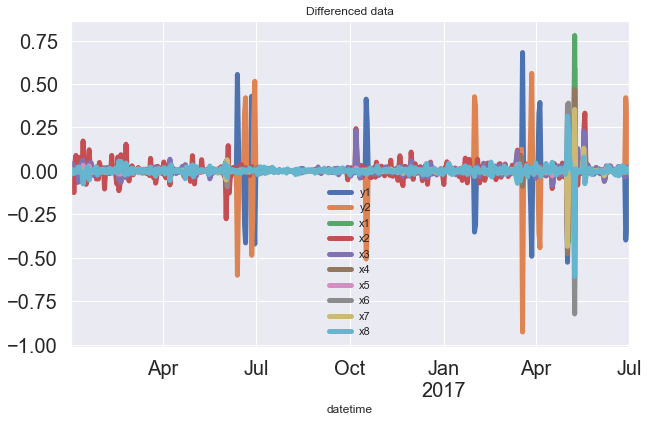

In [362]:
nobs = int(14) # number of future steps to predict

# differenced train data
data_diff = data.diff()
data_diff.dropna(inplace=True)
print('Glimpse of differenced data:')
print(data_diff.head())
# plotting differenced data
data_diff.plot(figsize=(10,6), linewidth=5, fontsize=20)
plt.title('Differenced data')
plt.show()

In [363]:
import smt
from statsmodels.tsa.api import VAR
var_model = VAR(data_diff)
res = var_model.select_order(maxlags=15)
print(res.summary())
results = var_model.fit(maxlags=15, ic='aic')
print(results.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -83.86      -83.78   3.788e-37      -83.83
1       -85.21     -84.33*   9.851e-38      -84.86
2       -85.72      -84.03   5.912e-38      -85.06
3       -85.92      -83.43   4.836e-38      -84.95
4       -86.00      -82.71   4.468e-38      -84.71
5       -86.24      -82.14   3.545e-38      -84.63
6       -86.90      -82.00   1.834e-38      -84.98
7       -87.59      -81.88   9.271e-39      -85.36
8       -87.86      -81.35   7.134e-39      -85.31
9       -88.33      -81.01   4.518e-39     -85.46*
10      -88.51      -80.39  3.819e-39*      -85.33
11      -88.48      -79.56   3.968e-39      -84.99
12     -88.52*      -78.79   3.910e-39      -84.71
13      -88.45      -77.92   4.264e-39      -84.33
14      -88.39      -77.06   4.664e-39      -83.95
15      -88.34      -76.20   5.067e-39      -83.59
-------------------------------

In [364]:
## Future predictions
# make predictions
pred = results.forecast(results.y, steps=nobs)
pred = DataFrame(pred, columns=data.columns+ '_pred')
print(pred)

     y1_pred   y2_pred   x1_pred   x2_pred   x3_pred   x4_pred   x5_pred  \
0  -0.029290  0.026013 -0.018546 -0.009403 -0.003228 -0.006809 -0.001091   
1   0.081413 -0.088157 -0.025388 -0.028584  0.010006 -0.001642  0.001509   
2   0.002280 -0.026745 -0.023588  0.018601  0.014979 -0.017310 -0.004827   
3   0.161215 -0.166918  0.015206  0.020836  0.002580  0.008966  0.003045   
4   0.280463 -0.278538  0.041753  0.011251  0.006735  0.023531  0.008711   
5   0.034588 -0.026617 -0.005185  0.001306 -0.001109 -0.003022 -0.002155   
6  -0.021439  0.018024 -0.002023 -0.021256 -0.012122 -0.007356 -0.003575   
7   0.061683 -0.090085 -0.024419 -0.001075 -0.006768 -0.009181 -0.002526   
8  -0.070419  0.044797 -0.037342  0.022358  0.008697 -0.015762 -0.003214   
9  -0.055484  0.055444 -0.002061  0.005446 -0.002883 -0.002448 -0.000589   
10 -0.059173  0.058555 -0.003243 -0.024385 -0.014346 -0.011358 -0.005444   
11 -0.115434  0.126189  0.003202 -0.032795 -0.024094 -0.003586 -0.003454   
12 -0.056706

In [365]:
pred = DataFrame(pred, columns=data.columns+ '_pred')
pred

,y1_pred,y2_pred,x1_pred,x2_pred,x3_pred,x4_pred,x5_pred,x6_pred,x7_pred,x8_pred
0,-0.029290,0.026013,-0.018546,-0.009403,-0.003228,-0.006809,-0.001091,0.030932,-0.009203,0.012644
1,0.081413,-0.088157,-0.025388,-0.028584,0.010006,-0.001642,0.001509,0.018608,0.006330,0.020183
2,0.002280,-0.026745,-0.023588,0.018601,0.014979,-0.017310,-0.004827,0.025253,-0.012438,0.017917
3,0.161215,-0.166918,0.015206,0.020836,0.002580,0.008966,0.003045,-0.014625,0.000716,-0.019493
4,0.280463,-0.278538,0.041753,0.011251,0.006735,0.023531,0.008711,-0.045832,0.009406,-0.040658
5,0.034588,-0.026617,-0.005185,0.001306,-0.001109,-0.003022,-0.002155,0.009129,-0.006853,0.005315
6,-0.021439,0.018024,-0.002023,-0.021256,-0.012122,-0.007356,-0.003575,0.012429,-0.012286,0.008897
7,0.061683,-0.090085,-0.024419,-0.001075,-0.006768,-0.009181,-0.002526,0.017220,-0.006166,0.012938
8,-0.070419,0.044797,-0.037342,0.022358,0.008697,-0.015762,-0.003214,0.032885,-0.020413,0.014829
9,-0.055484,0.055444,-0.002061,0.005446,-0.002883,-0.002448,-0.000589,0.003691,-0.009235,-0.005742


The table shows 14 days future prediction after the log trasformation. The predictions have to be trasformed to orginal values and dates have to assigned.

In [366]:
def invert_transformation(data_diff, pred):
    forecast = pred.copy()
    columns = data.columns
    for col in columns:
        forecast[str(col)+'_pred'] = data[col].iloc[-1] + forecast[str(col)+'_pred'].cumsum()
    return forecast


output = invert_transformation(data_diff, pred)
print(output.loc[:, ['y1_pred', 'y2_pred']])


     y1_pred   y2_pred
0  -0.020835  0.759939
1   0.060578  0.671782
2   0.062857  0.645037
3   0.224073  0.478119
4   0.504536  0.199581
5   0.539124  0.172963
6   0.517686  0.190987
7   0.579369  0.100901
8   0.508950  0.145699
9   0.453466  0.201143
10  0.394293  0.259697
11  0.278860  0.385886
12  0.222154  0.456765
13  0.280662  0.416141


In [367]:
output = DataFrame(output['y1_pred'])
print(output)

     y1_pred
0  -0.020835
1   0.060578
2   0.062857
3   0.224073
4   0.504536
5   0.539124
6   0.517686
7   0.579369
8   0.508950
9   0.453466
10  0.394293
11  0.278860
12  0.222154
13  0.280662


In [368]:
data.head(2)

,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
datetime,,,,,,,,,,
2016-01-01,0.008385,0.801011,0.934763,0.190546,0.276723,0.614372,0.230693,0.030598,0.697399,0.284563
2016-01-02,0.008402,0.793181,0.934907,0.192461,0.276673,0.615811,0.230170,0.022593,0.690917,0.268821


In [369]:
## Assigning future dates
d = data.tail(nobs)
d.reset_index(inplace = True)
d

,datetime,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8
0,2017-06-18,0.720184,0.004161,0.940098,0.629282,0.645588,0.669843,0.279725,0.037344,0.684989,0.195583
1,2017-06-19,0.724035,0.004172,0.936542,0.623456,0.640556,0.668230,0.278596,0.038838,0.686667,0.208998
2,2017-06-20,0.724707,0.004107,0.943362,0.625862,0.643275,0.670576,0.280682,0.039362,0.688903,0.206456
3,2017-06-21,0.720405,0.004174,0.942842,0.651040,0.667725,0.678743,0.288437,0.030776,0.689892,0.177954
4,2017-06-22,0.725148,0.004107,0.943240,0.650230,0.662395,0.669633,0.279204,0.040762,0.690198,0.202689
5,2017-06-23,0.719228,0.004199,0.942516,0.667500,0.681502,0.672896,0.282972,0.037218,0.678925,0.185518
6,2017-06-24,0.728056,0.004129,0.942574,0.673824,0.687694,0.667482,0.276994,0.043126,0.681870,0.203206
7,2017-06-25,0.731368,0.004214,0.948245,0.677536,0.688176,0.660287,0.268822,0.053619,0.687519,0.233001
8,2017-06-26,0.725971,0.004151,0.946830,0.655072,0.663529,0.662471,0.271446,0.047310,0.685139,0.223976
9,2017-06-27,0.726607,0.004203,0.936408,0.622410,0.628953,0.655233,0.263044,0.045142,0.688876,0.231314


In [370]:
d = d.append(DataFrame({'datetime': pd.date_range(start = d.datetime.iloc[-1], periods = (len(d)+1), freq = 'd', closed = 'right')}))
d.set_index('datetime', inplace = True)
d = d.tail(nobs)
output.index = d.index
print(output)

             y1_pred
datetime            
2017-07-02 -0.020835
2017-07-03  0.060578
2017-07-04  0.062857
2017-07-05  0.224073
2017-07-06  0.504536
2017-07-07  0.539124
2017-07-08  0.517686
2017-07-09  0.579369
2017-07-10  0.508950
2017-07-11  0.453466
2017-07-12  0.394293
2017-07-13  0.278860
2017-07-14  0.222154
2017-07-15  0.280662


In [371]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()
n = output.index[0]

fig.add_trace(go.Scatter(x = data.index[-200:], y = data['y1'][-200:], marker = dict(color ="red"), name = "Actual close price"))
fig.add_trace(go.Scatter(x = output.index, y = output['y1_pred'], marker=dict(color = "green"), name = "Future prediction"))
fig.update_xaxes(showline = True, linewidth = 2, linecolor='black', mirror = True, showspikes = True,)
fig.update_yaxes(showline = True, linewidth = 2, linecolor='black', mirror = True, showspikes = True,)
fig.update_layout(title= "14 days days y1 Forecast", yaxis_title = 'y1', hovermode = "x", hoverdistance = 100, 
                  # Distance to show hover label of data point 
                  spikedistance = 1000,shapes = [dict( x0 = n, x1 = n, y0 = 0, y1 = 1, xref = 'x', yref = 'paper', line_width = 2)], annotations = [dict(x = n, y = 0.05, xref = 'x', yref = 'paper', showarrow = False, xanchor = 'left', text = 'Prediction')])
                  
fig.update_layout(autosize = False, width = 1000, height = 400,)
fig.show()

In [356]:
output = DataFrame(output['y2_pred'])
print(output)

     y2_pred
0   0.759939
1   0.671782
2   0.645037
3   0.478119
4   0.199581
5   0.172963
6   0.190987
7   0.100901
8   0.145699
9   0.201143
10  0.259697
11  0.385886
12  0.456765
13  0.416141


In [357]:
## Assigning future dates
d = data.tail(nobs)
d.reset_index(inplace = True)

d = d.append(DataFrame({'datetime': pd.date_range(start = d.datetime.iloc[-1], periods = (len(d)+1), freq = 'd', closed = 'right')}))
d.set_index('datetime', inplace = True)
d = d.tail(nobs)
output.index = d.index
print(output)

             y2_pred
datetime            
2017-07-02  0.759939
2017-07-03  0.671782
2017-07-04  0.645037
2017-07-05  0.478119
2017-07-06  0.199581
2017-07-07  0.172963
2017-07-08  0.190987
2017-07-09  0.100901
2017-07-10  0.145699
2017-07-11  0.201143
2017-07-12  0.259697
2017-07-13  0.385886
2017-07-14  0.456765
2017-07-15  0.416141


In [358]:
fig = go.Figure()
n = output.index[0]

fig.add_trace(go.Scatter(x = data.index[-200:], y = data['y2'][-200:], marker = dict(color ="red"), name = "Actual close price"))
fig.add_trace(go.Scatter(x = output.index, y = output['y2_pred'], marker=dict(color = "green"), name = "Future prediction"))
fig.update_xaxes(showline = True, linewidth = 2, linecolor='black', mirror = True, showspikes = True,)
fig.update_yaxes(showline = True, linewidth = 2, linecolor='black', mirror = True, showspikes = True,)
fig.update_layout(title= "14 days days y2 Forecast", yaxis_title = 'y2)', hovermode = "x", hoverdistance = 100, 
                  # Distance to show hover label of data point 
                  spikedistance = 1000,shapes = [dict( x0 = n, x1 = n, y0 = 0, y1 = 1, xref = 'x', yref = 'paper', line_width = 2)], annotations = [dict(x = n, y = 0.05, xref = 'x', yref = 'paper', showarrow = False, xanchor = 'left', text = 'Prediction')])
                  
fig.update_layout(autosize = False, width = 1000, height = 400,)
fig.show()